Figures 1 and 2 will show what I'm talking about with the Indian Ocean heating band. 

Could even just be the single figure (both map and zonal average view). 

Extended figure can show the difference between WOA smoothed and the actual observations. 

In [2]:
import numpy as np
import matplotlib.pylab as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy
import gsw

foldern = 'Jan22means/'

In [168]:
import colormaps as cmaps

In [ ]:
# Get WOA data 
folderT = "/nfs/data/WOA2023/Temperature_DecadalAverages/"
folderS = "/nfs/data/WOA2018/Salinity_DecadalAverages/"

WOA_T5 = xr.open_dataset(folderT+'woa18_5564_t00_01.nc', decode_times=False) 
#WOA_T6 = xr.open_dataset(folderT+'woa18_6574_t00_01.nc', decode_times=False) 
#WOA_T7 = xr.open_dataset(folderT+'woa18_7584_t00_01.nc', decode_times=False) 
#WOA_T8 = xr.open_dataset(folderT+'woa18_8594_t00_01.nc', decode_times=False) 
#WOA_T9 = xr.open_dataset(folderT+'woa18_95A4_t00_01.nc', decode_times=False) 
#WOA_TA = xr.open_dataset(folderT+'woa18_A5B7_t00_01.nc', decode_times=False) 
#
#WOA_S5 = xr.open_dataset(folderS+'woa18_5564_s00_01.nc', decode_times=False) 
#WOA_S6 = xr.open_dataset(folderS+'woa18_6574_s00_01.nc', decode_times=False) 
#WOA_S7 = xr.open_dataset(folderS+'woa18_7584_s00_01.nc', decode_times=False) 
#WOA_S8 = xr.open_dataset(folderS+'woa18_8594_s00_01.nc', decode_times=False) 
#WOA_S9 = xr.open_dataset(folderS+'woa18_95A4_s00_01.nc', decode_times=False) 
#WOA_SA = xr.open_dataset(folderS+'woa18_A5B7_s00_01.nc', decode_times=False) 

In [3]:
foldern = "Jan22means/"
avgT1960s = xr.open_dataarray(foldern + 'IAP_OceanT_1955to1973.nc')
avgT2000s = xr.open_dataarray(foldern + 'IAP_OceanT_2000to2018.nc')

## Southern hemisphere map of heating, vertically integrated! 

## calculating Ocean Heat content in top 2000 m 
IAPlev = avgT1960s.depth_std
# need to get levh 
levh = np.zeros(len(IAPlev))
levh[0] = 0.5*IAPlev[0]+ 0.5*IAPlev[1]
for k in np.arange(1,len(IAPlev)-1):
    levh[k] = 0.5*(IAPlev[k+1]- IAPlev[k-1])
levh[-1] = 2000-sum(levh[0:-1])

IAPlevh = levh 

avgT1960s_Q = avgT1960s.transpose('lon', 'lat', 'depth_std')*np.squeeze(IAPlevh)
avgT1960s_Q = np.sum(avgT1960s_Q,2)*3850*1025

avgT2000s_Q = avgT2000s.transpose('lon', 'lat', 'depth_std')*np.squeeze(IAPlevh)
avgT2000s_Q = np.sum(avgT2000s_Q,2)*3850*1025

In [4]:
# More AVISO data - now computing MKE from the geostrophic velocities. First step is to figure out if it's anomaly or mean.
#fn = '/nfs/data/AVISO/Mean_Sea_Level_Anomaly/Climatology/dt_global_allsat_msla_u_y1993_2021_m01_03.nc' 
#u_wint = xr.open_dataset(fn)
fn = '/nfs/data/AVISO/Absolute_Dynamic_Topo/Seasonal/dt_global_allsat_madt_u_y1993_2021_m10_12.nc'
u_autu = xr.open_dataset(fn)
fn = '/nfs/data/AVISO/Absolute_Dynamic_Topo/Seasonal/dt_global_allsat_madt_u_y1993_2021_m07_09.nc'
u_summ = xr.open_dataset(fn)
fn = '/nfs/data/AVISO/Absolute_Dynamic_Topo/Seasonal/dt_global_allsat_madt_u_y1993_2021_m04_06.nc'
u_spri = xr.open_dataset(fn)
fn = '/nfs/data/AVISO/Absolute_Dynamic_Topo/Seasonal/dt_global_allsat_madt_u_y1993_2021_m01_03.nc'
u_wint = xr.open_dataset(fn)
fn = '/nfs/data/AVISO/Absolute_Dynamic_Topo/Seasonal/dt_global_allsat_madt_v_y1993_2021_m10_12.nc'
v_autu = xr.open_dataset(fn)
fn = '/nfs/data/AVISO/Absolute_Dynamic_Topo/Seasonal/dt_global_allsat_madt_v_y1993_2021_m07_09.nc'
v_summ = xr.open_dataset(fn)
fn = '/nfs/data/AVISO/Absolute_Dynamic_Topo/Seasonal/dt_global_allsat_madt_v_y1993_2021_m04_06.nc'
v_spri = xr.open_dataset(fn)
fn = '/nfs/data/AVISO/Absolute_Dynamic_Topo/Seasonal/dt_global_allsat_madt_v_y1993_2021_m01_03.nc'
v_wint = xr.open_dataset(fn)

In [5]:
u_mean = (u_autu.ugos.isel(time=0) + u_summ.ugos.isel(time=0) +u_spri.ugos.isel(time=0)+u_wint.ugos.isel(time=0))/4
v_mean = (v_autu.vgos.isel(time=0) + v_summ.vgos.isel(time=0) +v_spri.vgos.isel(time=0)+v_wint.vgos.isel(time=0))/4
u2_mean = u_mean**2
v2_mean = v_mean**2
mke_mean = 0.5*1035*(u2_mean+v2_mean)



## Along-front averages in this region

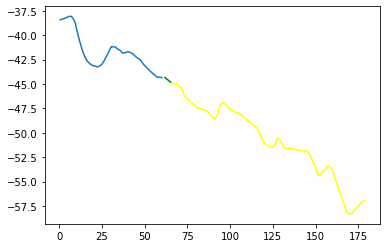

In [6]:
alim=157
tlim = 55
pts = 4


orsi1 = xr.open_dataset('Orsi_Fronts.nc')
orsiSAFx = orsi1.xsaf
orsiSAFy = orsi1.ysaf
#plt.plot(orsiSAFx,orsiSAFy)
orsiSTFx = orsi1.xstf
orsiSTFy = orsi1.ystf

plt.plot(orsiSTFx[0:tlim],orsiSTFy[0:tlim])

y1 = orsiSTFy[tlim-1].values
y2 = orsiSAFy[alim+1].values
x1 = orsiSTFx[tlim].values
x2 = orsiSAFx[alim].values
fill = np.arange(pts)/4
fillx = x1+ fill*(x2-x1)
filly = y1+ fill*(y2-y1)
plt.plot(fillx,filly, 'green')
plt.plot(orsiSAFx[alim:380], orsiSAFy[alim:380], color = 'yellow')

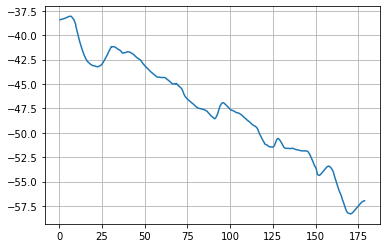

In [7]:
SJFx = np.concatenate((orsiSTFx[0:tlim], fillx, orsiSAFx[alim:380]))
#plt.plot(np.diff(SJFx))
plt.grid()
SJFy = np.concatenate((orsiSTFy[0:tlim], filly, orsiSAFy[alim:380]))
plt.plot(SJFx, SJFy)


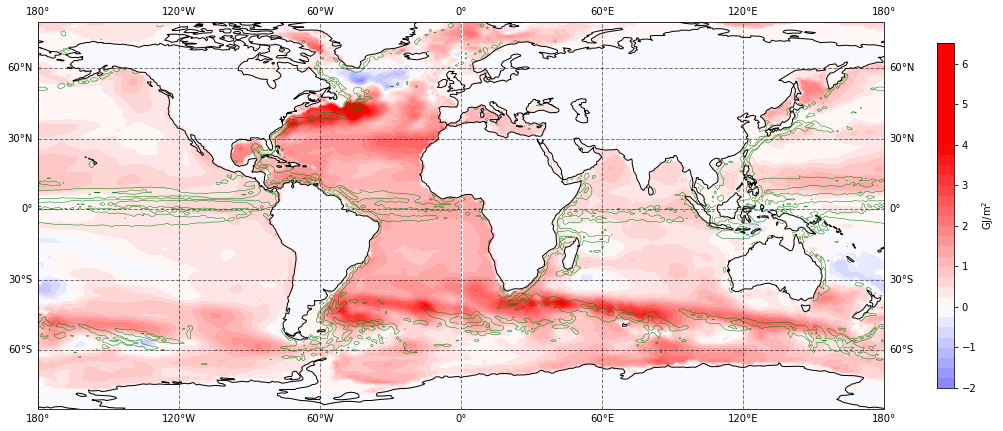

In [8]:
## Figure 1, the map

fig = plt.figure(figsize=(15,9))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

reglat = np.arange(5,170)
reglon =np.arange(0,360)
#clims = [-5e9, 5e9]

toPl3 = avgT2000s_Q.transpose() - avgT1960s_Q.transpose()

lon = avgT1960s.lon
lat = avgT1960s.lat

Q = plt.contourf(lon[reglon], lat[reglat], 1e-9*toPl3[reglat,reglon] , 
          transform=ccrs.PlateCarree(), vmin = -4, vmax = 4,levels =35 )

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
plt.set_cmap("bwr")
#ax.set_title("Observed Increase in Ocean Heat Content above 2000m depth", fontsize = 'x-large')


mlat = reglat - 90 # actual latitude
plt.contour(mke_mean.longitude.sel(longitude = reglon, method = 'nearest'),mke_mean.latitude.sel(latitude = mlat, method = 'nearest'),  mke_mean.sel(longitude = reglon, latitude=mlat, method = 'nearest'), levels=[ 10, 50], linewidths = 0.5, colors='green')


### plt.plot(orsiSTFx, orsiSTFy, color = 'yellow',transform=ccrs.PlateCarree())

#plt.plot(SJFx, SJFy, '--', color = 'yellow', linewidth = 2, transform=ccrs.PlateCarree())
#plt.plot(orsiSTFx,orsiSTFy, linestyle='dashed',)
#plt.plot(orsiSAFx[1:380], orsiSAFy[1:380], color = 'yellow',transform=ccrs.PlateCarree(),linestyle='dashed')
#plt.xlim([0,180])


#plt.legend(['ARC-SAF'], prop=dict(size=14))
#plt.legend(['Subtropical Front', 'Subantarctic Front'], prop=dict(size=14))

#plt.legend([ 'ARC-SAF', 'Subtropical Front', 'Subantarctic Front'], prop=dict(size=14))


cb = fig.colorbar(Q,shrink = 0.55)
cb.set_label("GJ/m$^2$")
fig.tight_layout()
#plt.savefig('SISAZ_figures/Obs_OHCmap_5-6-24.eps')
#plt.savefig('SISAZ_figures/GlobalOHCmap_7-4.eps')


In [18]:
toPl3.where(toPl3 >0 )

<xarray.DataArray 'temp' (lat: 180, lon: 360)>
array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       ...,
       [4.67364837e+08, 4.60755578e+08, 4.54150364e+08, ...,
        4.81044030e+08, 4.73067717e+08, 4.64535216e+08],
       [6.61678076e+08, 6.53377738e+08, 6.44854393e+08, ...,
        6.78415122e+08, 6.69836653e+08, 6.61523976e+08],
       [6.13588733e+08, 5.98997527e+08, 5.84597424e+08, ...,
        6.67876480e+08, 6.51608913e+08, 6.34784301e+08]])
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1.0 2.0 3.0 4.0 5.0 ... 356.0 357.0 358.0 359.0 360.0

/home/bataylor/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'projection'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


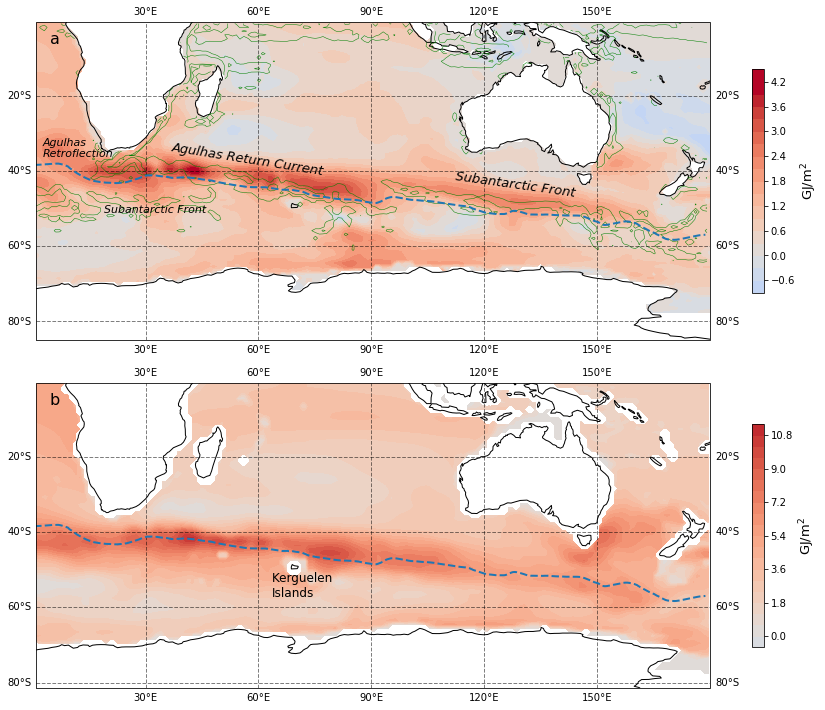

In [167]:
## Figure 1a and b combined!
fig,ax= plt.subplots(nrows =2, ncols =1, figsize=(12,10), subplot_kw={'projection': ccrs.PlateCarree()})
#ax = plt.axes(projection=ccrs.PlateCarree())
ax[0].coastlines()
ax[1].coastlines()

cmap = LinearSegmentedColormap.from_list('test1', mycols, N=18)
plt.set_cmap(cmaps.cmp_b2r) # spectral_r isn't horrible. 
MMM_OHC = xr.open_dataset('SISAZ_figures/MMM_1pctCO2_OHC_5-9.nc')

reglat = np.arange(5,90)
reglon =np.arange(0,180)
#clims = [-5e9, 5e9]

toPl3 = avgT2000s_Q.transpose() - avgT1960s_Q.transpose()

toPl3 = toPl3.where(toPl3 !=0)

lon = avgT1960s.lon
lat = avgT1960s.lat

Q = ax[0].contourf(lon[reglon], lat[reglat], 1e-9*toPl3[reglat,reglon] , 
          transform=ccrs.PlateCarree(), vmin = -4, vmax = 4,levels =18 )

ax[0].set_xlim(1,180)

gl = ax[0].gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
ax[0].text(0.02, 0.93, 'a', size = 16, transform = ax[0].transAxes)
#ax.set_title("Observed Increase in Ocean Heat Content above 2000m depth", fontsize = 'x-large')
#ax[0].set_xlim(0,180)

mlat = reglat - 90 # actual latitude
ax[0].contour(mke_mean.longitude.sel(longitude = reglon, method = 'nearest'),mke_mean.latitude.sel(latitude = mlat, method = 'nearest'),  mke_mean.sel(longitude = reglon, latitude=mlat, method = 'nearest'), levels=[ 10, 50], linewidths = 0.5, colors='green')


### plt.plot(orsiSTFx, orsiSTFy, color = 'yellow',transform=ccrs.PlateCarree())

ax[0].plot(SJFx, SJFy, '--', linewidth = 2, transform=ccrs.PlateCarree())
#plt.plot(orsiSTFx,orsiSTFy, linestyle='dashed',)
#plt.plot(orsiSAFx[1:380], orsiSAFy[1:380], color = 'yellow',transform=ccrs.PlateCarree(),linestyle='dashed')
#plt.xlim([0,180])

A = ax[1].contourf( MMM_OHC.lon.isel(lon = reglon), MMM_OHC.lat.isel(lat=reglat), MMM_OHC.OHC.isel(lat = reglat, lon = reglon), vmin = -12, vmax = 12, projection=ccrs.PlateCarree(), levels = 18)
ax[1].plot(SJFx, SJFy, '--', linewidth = 2, transform=ccrs.PlateCarree())
ax[1].set_xlim(1,180)


#reglat = np.arange(5,90)
#reglon =np.arange(0,180)
##clims = [-5e9, 5e9]
#
#toPl3 = avgT2000s_Q.transpose() - avgT1960s_Q.transpose()
#
##lon = avgT1960s.lon
##lat = avgT1960s.lat
#
#Q = plt.contourf(lon[reglon], lat[reglat], 1e-9*toPl3[reglat,reglon] , 
#          transform=ccrs.PlateCarree(), vmin = -4, vmax = 4,levels =35 )

gl = ax[1].gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)

ax[1].text(0.02, 0.93, 'b', size = 16, transform = ax[1].transAxes)#ax.set_title("", fontsize = 'x-large')
#ax[0].text(0.2, 0.52, 'Agulhas Return Current', size = 13, fontstyle = 'italic', rotation = -9, transform = ax[0].transAxes, rasterized = False)
#ax[0].text(0.62, 0.45, 'Subantarctic Front', size = 13, fontstyle = 'italic', rotation = -8, transform = ax[0].transAxes)
#ax[0].text(0.01, 0.575, 'Agulhas \nRetroflection', size = 11, fontstyle = 'italic', transform = ax[0].transAxes)
#ax[0].text(0.1, 0.4, 'Subantarctic Front', size = 11, fontstyle = 'italic', transform = ax[0].transAxes)
ax[1].text(0.35, 0.3, 'Kerguelen \nIslands', size = 12, transform = ax[1].transAxes)
#plt.legend(['ARC-SAF'], prop=dict(size=14))
#plt.legend(['Subtropical Front', 'Subantarctic Front'], prop=dict(size=14))

#plt.legend([ 'ARC-SAF', 'Subtropical Front', 'Subantarctic Front'], prop=dict(size=14))
fig.tight_layout()

cb = fig.colorbar(Q,ax=ax[0], shrink = 0.65)
cb.set_label("GJ/m$^2$", size = 13)
cb2 = fig.colorbar(A,ax=ax[1], shrink = 0.65)
cb2.set_label("GJ/m$^2$", size = 13)
#plt.savefig('SISAZ_figures/ObsANDmodel_OHCmap_7-4.eps')
#plt.savefig('SISAZ_figures/Obs_OHCmap_5-6-24.jpg')


/home/bataylor/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'projection'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/home/bataylor/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


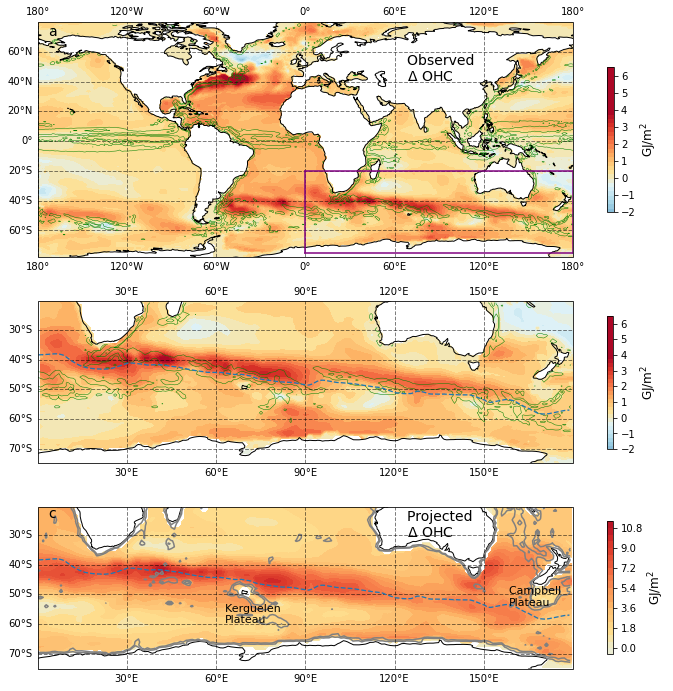

In [505]:
## Modified version where I show the whole globe ... and then zoom in on the Indian Ocean ... 

fig,ax= plt.subplots(nrows =3, ncols =1, figsize=(12,12), subplot_kw={'projection': ccrs.PlateCarree()},gridspec_kw={'height_ratios': [1.45,1,1]})
#ax = plt.axes(projection=ccrs.PlateCarree())
ax[0].coastlines()
ax[1].coastlines()
ax[2].coastlines()


reglat = np.arange(10,170)
reglon =np.arange(0,360)
#clims = [-5e9, 5e9]

toPl3 = avgT2000s_Q.transpose() - avgT1960s_Q.transpose()
toPl3 = toPl3.where(toPl3!=0)

lon = avgT1960s.lon
lat = avgT1960s.lat
plt.set_cmap(cmaps.cmp_b2r)#")

Q = ax[0].contourf(lon[reglon], lat[reglat], 1e-9*toPl3[reglat,reglon] , 
          transform=ccrs.PlateCarree(), vmin = -4, vmax = 4,levels =35 )

gl0 = ax[0].gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)

#ax.set_title("Observed Increase in Ocean Heat Content above 2000m depth", fontsize = 'x-large')
gl0.right_labels=False

mlat = reglat - 90 # actual latitude
ax[0].contour(mke_mean.longitude.sel(longitude = reglon, method = 'nearest'),mke_mean.latitude.sel(latitude = mlat, method = 'nearest'),  mke_mean.sel(longitude = reglon, latitude=mlat, method = 'nearest'), levels=[ 10, 50], linewidths = 0.5, colors='green')
ax[0].plot([0,0],[-75,-20], 'purple')
ax[0].plot([0,180],[-20,-20], 'purple')
ax[0].plot([180,180],[-75,-20], 'purple')
ax[0].plot([0,180],[-75,-75], 'purple')
ax[0].set_ylim(-78,80)
### plt.plot(orsiSTFx, orsiSTFy, color = 'yellow',transform=ccrs.PlateCarree())

#plt.plot(SJFx, SJFy, '--', color = 'yellow', linewidth = 2, transform=ccrs.PlateCarree())
#plt.plot(orsiSTFx,orsiSTFy, linestyle='dashed',)
#plt.plot(orsiSAFx[1:380], orsiSAFy[1:380], color = 'yellow',transform=ccrs.PlateCarree(),linestyle='dashed')
#plt.xlim([0,180])


#plt.legend(['ARC-SAF'], prop=dict(size=14))
#plt.legend(['Subtropical Front', 'Subantarctic Front'], prop=dict(size=14))

#plt.legend([ 'ARC-SAF', 'Subtropical Front', 'Subantarctic Front'], prop=dict(size=14))






#cmap = LinearSegmentedColormap.from_list('test1', mycols, N=18)
plt.set_cmap(cmaps.cmp_b2r)#'coolwarm') # spectral_r isn't horrible. 
MMM_OHC = xr.open_dataset('SISAZ_figures/MMM_1pctCO2_OHC_5-9.nc')

reglat = np.arange(15,70)
reglon =np.arange(0,180)
#clims = [-5e9, 5e9]

toPl3 = avgT2000s_Q.transpose() - avgT1960s_Q.transpose()

toPl3 = toPl3.where(toPl3 !=0)

lon = avgT1960s.lon
lat = avgT1960s.lat

Q1 = ax[1].contourf(lon[reglon], lat[reglat], 1e-9*toPl3[reglat,reglon] , 
          transform=ccrs.PlateCarree(), vmin = -4, vmax = 4,levels =18 )

ax[1].set_xlim(0.1,180)

gl1 = ax[1].gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl1.right_labels = False
#ax.set_title("Observed Increase in Ocean Heat Content above 2000m depth", fontsize = 'x-large')
#ax[0].set_xlim(0,180)

mlat = reglat - 90 # actual latitude
ax[1].contour(mke_mean.longitude.sel(longitude = reglon, method = 'nearest'),mke_mean.latitude.sel(latitude = mlat, method = 'nearest'),  mke_mean.sel(longitude = reglon, latitude=mlat, method = 'nearest'), levels=[ 10, 50], linewidths = 0.5, colors='green')


### plt.plot(orsiSTFx, orsiSTFy, color = 'yellow',transform=ccrs.PlateCarree())

ax[1].plot(SJFx, SJFy, '--', linewidth = 1.3, transform=ccrs.PlateCarree())
#plt.plot(orsiSTFx,orsiSTFy, linestyle='dashed',)
#plt.plot(orsiSAFx[1:380], orsiSAFy[1:380], color = 'yellow',transform=ccrs.PlateCarree(),linestyle='dashed')
#plt.xlim([0,180])

A = ax[2].contourf( MMM_OHC.lon.isel(lon = reglon), MMM_OHC.lat.isel(lat=reglat), MMM_OHC.OHC.isel(lat = reglat, lon = reglon), vmin = -12, vmax = 12, projection=ccrs.PlateCarree(), levels = 18)
ax[2].plot(SJFx, SJFy, '--', linewidth = 1.3, transform=ccrs.PlateCarree())



tlat = reglat - 90

ax[2].contour(topo.x.sel(x= reglon, method= 'nearest'), topo.y.sel(y=tlat), topo.z.sel(x=reglon, y=tlat, method = 'nearest'), levels =[-2000, -1000], linestyles ='solid', colors='gray')
ax[2].set_xlim(0.1,180)
#reglat = np.arange(5,90)
#reglon =np.arange(0,180)
##clims = [-5e9, 5e9]
#
#toPl3 = avgT2000s_Q.transpose() - avgT1960s_Q.transpose()
#
##lon = avgT1960s.lon
##lat = avgT1960s.lat
#
#Q = plt.contourf(lon[reglon], lat[reglat], 1e-9*toPl3[reglat,reglon] , 
#          transform=ccrs.PlateCarree(), vmin = -4, vmax = 4,levels =35 )

gl2 = ax[2].gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='k', alpha=0.5, linestyle='--', draw_labels=True)
gl2.right_labels = False
gl2.xlabels_top = False
ax[0].text(0.02, 0.94, 'a', size = 14, transform = ax[0].transAxes)
#ax[1].text(0.02, 0.93, 'b', size = 14, transform = ax[1].transAxes)
ax[2].text(0.02, 0.93, 'c', size = 14, transform = ax[2].transAxes)#ax.set_title("", fontsize = 'x-large')
#ax[1].text(0.2, 0.56, 'Agulhas Return Current', size = 12, fontstyle = 'italic', rotation = -9, transform = ax[1].transAxes, rasterized = False)
#ax[1].text(0.62, 0.46, 'Subantarctic Front', size = 12, fontstyle = 'italic', rotation = -8, transform = ax[1].transAxes)
#ax[1].text(0.01, 0.575, 'Agulhas \nRetroflection', size = 10, fontstyle = 'italic', transform = ax[1].transAxes)
#ax[1].text(0.1, 0.4, 'Subantarctic Front', size = 10, fontstyle = 'italic', transform = ax[1].transAxes)
ax[2].text(0.35, 0.28, 'Kerguelen \nPlateau', size = 11, transform = ax[2].transAxes)
ax[2].text(0.88, 0.39, 'Campbell \nPlateau', size = 11, transform = ax[2].transAxes)


# Text titles 
ax[0].text(0.69, 0.75, 'Observed  \n$\Delta$ OHC', size = 14, transform = ax[0].transAxes)
#ax[1].text(0.69, 0.81, 'Observed  \n$\Delta$ OHC', size = 14, transform = ax[1].transAxes)
ax[2].text(0.69, 0.81, 'Projected \n$\Delta$ OHC', size =14, transform = ax[2].transAxes)

#plt.legend(['ARC-SAF'], prop=dict(size=14))
#plt.legend(['Subtropical Front', 'Subantarctic Front'], prop=dict(size=14))

#plt.legend([ 'ARC-SAF', 'Subtropical Front', 'Subantarctic Front'], prop=dict(size=14))
#fig.tight_layout()

cb0 = fig.colorbar(Q,ax=ax[0], shrink = 0.6)
cb0.set_label("GJ/m$^2$", size  =12)
cb1 = fig.colorbar(Q,ax=ax[1], shrink = 0.8)
cb1.set_label("GJ/m$^2$", size = 12)
cb2 = fig.colorbar(A,ax=ax[2], shrink = 0.8)
cb2.set_label("GJ/m$^2$", size = 12)
#plt.savefig('SISAZ_figures/3panel_OHCmap_7-30.eps')
#plt.savefig('SISAZ_figures/Obs_OHCmap_5-6-24.jpg')


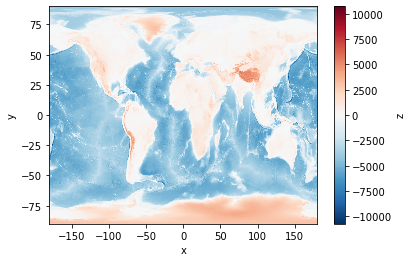

In [88]:
topo.z.plot()

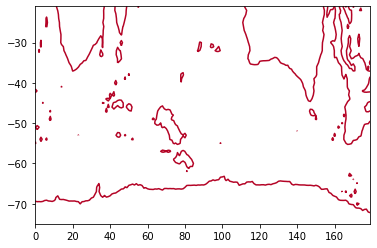

In [96]:
reglat = np.arange(15,70)
tlat = reglat - 90
reglon =np.arange(0,180)
plt.contour(topo.x.sel(x= reglon, method= 'nearest'), topo.y.sel(y=tlat), topo.z.sel(x=reglon, y=tlat, method = 'nearest'), levels =[-20000, -2000])

In [85]:
# Ok so this is great! I like this, but it will probably be useful to include some bathymetry if we're naming features

# I wonder if I can just grab that bathymetry data and plot some 1000m isolines? 
topo = xr.open_dataset('ETOPO2v2g_f4.nc')


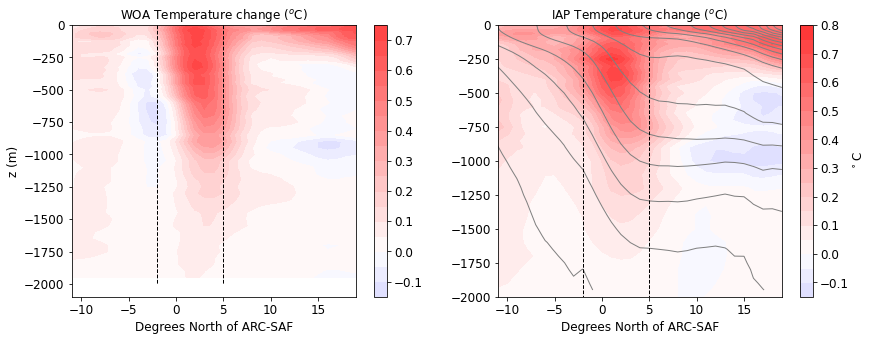

In [10]:
# Potential Fig 2 or 1b showing frontal average of IAP and WOA data.

# might want to add isopycnals (from recent times? more accurate?)

avgT1960s = xr.open_dataarray(foldern + 'IAP_OceanT_1955to1973.nc')
avgT2000s = xr.open_dataarray(foldern + 'IAP_OceanT_2000to2018.nc')

IAPlev = avgT1960s.depth_std

regdep = np.arange(0,44)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,5)) 


lats = -65 # write these between -90 and 90
latn = -10  

lonw = 20 #write these between 0 and 359! works globally
lone = 150

depth = 2000

vmS = 0.1
vmT = 1
vmsig = 0.2

sos = 12
nos = 20

IAPlon = np.arange(lonw, lone)
wocelat = np.arange(lats+90,latn+90)
wocew = (lonw+180)%360
wocee = (lone+180)%360
if wocee<wocew:
    wocew = wocew-360
wocelon = np.arange(wocew,wocee) # no this messes up if section includes 180. There's a better way.
wocedep = np.arange(0, np.argmin(np.abs(np.array(WOA_TA.depth- depth))))

# SAFy=np.interp(np.arange(lonw,lone)+0.5,orsiSAFx,orsiSAFy) 
ARCSAFy=np.interp(np.arange(lonw,lone)+0.5,SJFx,SJFy) 


sf = np.array(WOA_SA.s_an.isel(time=0))
si = np.array(WOA_S6.s_an.isel(time=0)) + np.array(WOA_S5.s_an.isel(time=0))
sald = sf-si/2

tf = np.array(WOA_TA.t_an.isel(time=0))
ti = np.array(WOA_T6.t_an.isel(time=0)) + np.array(WOA_T5.t_an.isel(time=0))
thed = tf-ti/2


IAPtf = np.array(avgT2000s.transpose('depth_std','lat','lon'))
IAPti = np.array(avgT1960s.transpose('depth_std','lat','lon'))
IAPthed = IAPtf-IAPti

sigi = gsw.sigma0(si/2, ti/2) #WOA_S6.s_an[0,wocedep,wocelat,wocelon], WOA_T6.t_an[0,wocedep,wocelat,wocelon])
sigf = gsw.sigma0(sf, tf)
sigd = sigf-sigi

WOA_theta_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
IAP_theta_str = np.zeros([len(IAPlev), sos+nos, len(IAPlon)])
WOA_tf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_sal_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_sf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_sig_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_sigf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])



#plot1 = np.mean(pl_cont_u[:,:,mylon],2) 
#toPl = np.diff(toPl,1)

for i in np.arange(0,len(wocelon)-1):
    a = int(ARCSAFy[i])+ 90
    WOA_sal_str[:,:,i] = sald[wocedep, a-sos:a+nos, wocelon[i]]
    WOA_theta_str[:,:,i] = thed[wocedep, a-sos:a+nos,wocelon[i]]
    IAP_theta_str[:,:,i] = IAPthed[:, a-sos:a+nos,IAPlon[i]]
    WOA_sig_str[:,:,i] = sigd[wocedep, a-sos:a+nos,wocelon[i]]
    WOA_sf_str[:,:,i] = sf[wocedep, a-sos:a+nos, wocelon[i]]
    WOA_tf_str[:,:,i] = tf[wocedep, a-sos:a+nos,wocelon[i]]
    WOA_sigf_str[:,:,i] = sigf[wocedep, a-sos:a+nos,wocelon[i]]

plt.set_cmap('bwr')
#tf = np.array(WOA_TA.t_an[wocedep,wocelat,wocelon])
#ti = np.array(WOA_T6.t_an[0,wocedep,wocelat,wocelon].mean(dim='lon')) + np.array(WOA_T5.t_an[0,wocedep,wocelat,wocelon].mean(dim='lon'))
#ti =ti/2
A= axs[0].contourf(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nanmean(WOA_theta_str,2), 20, vmin=-vmT, vmax=vmT)
B = axs[1].contourf(np.arange(-sos,nos), -IAPlev, np.nanmean(IAP_theta_str,2), 20, vmin=-vmT, vmax=vmT)

axs[1].contour(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nanmean(WOA_sigf_str,2), 20 , colors = 'gray', linewidths = 1)

axs[0].set_title("WOA Temperature change ($^o$C)")  
#axs[1,0].set_title("0.5 degree shift ($^o$C)")#cb = fig.colorbar(fig,shrink = 0.5)
#axs[1,0].set_title("0.5$^o$ T shift ($^o$C)")
axs[1].set_title("IAP Temperature change ($^o$C)")
#fig.suptitle('Indian basin (20-150) average') # can add in, it's fine.


#axs[1,1].set_title("0.5$^o$ S shift (psu)")
#axs[0,2].set_title("Density change(kg/m$^3$)")
#axs[1,2].set_title("0.5$^o$ Density shift (kg/m$^3$)")
#
#axs[1,1].set_xlim(-sos,nos-1)

#axs[2,1].set_title("\'u\' change from Passive Heat" )

axs[0].set_ylabel("z (m)", fontsize = 'large')
#axs[1,0].set_ylabel("z (m)", fontsize = 'large')
axs[1].set_xlabel("Degrees North of ARC-SAF", fontsize='large')
axs[0].set_xlabel("Degrees North of ARC-SAF", fontsize='large')
#axs[1,2].set_xlabel("Degrees North of SAF", fontsize='large')

Acb = fig.colorbar(A, ax=axs[0])
Bcb = fig.colorbar(B, ax=axs[1])
#Ccb = fig.colorbar(C, ax=axs[0,2])
#Dcb = fig.colorbar(D, ax=axs[1,0])
#Ecb = fig.colorbar(E, ax=axs[1,1])
#Fcb = fig.colorbar(F, ax=axs[1,2])
#
#cb.set_label("$^\circ$C",fontsize = 'large')
Bcb.set_label("$^\circ$C",fontsize = 'large')

#
labelsz = 12
Acb.ax.tick_params(labelsize=labelsz)
Bcb.ax.tick_params(labelsize=labelsz)
#Ccb.ax.tick_params(labelsize=labelsz)
#Dcb.ax.tick_params(labelsize=labelsz)
#Ecb.ax.tick_params(labelsize=labelsz)
#Fcb.ax.tick_params(labelsize=labelsz)



# contours are for reference

for j in (0,1):
    axs[j].tick_params(axis= 'x',labelsize = labelsz)
    axs[j].tick_params(axis= 'y',labelsize = labelsz)
    #axs[j].grid()
    axs[j].set_xlim(-sos+1,nos-1)
    axs[j].plot(0*IAPlev-2, -IAPlev, linestyle='dashed', color='black', linewidth = 1)
    axs[j].plot(0*IAPlev+5, -IAPlev, linestyle='dashed', color='black', linewidth = 1)

#plt.savefig('SISAZ_figures/streamline_WOAvsIAP_11-10_TS_Indian.eps')


In [11]:
np.arange(sos,nos)

array([12, 13, 14, 15, 16, 17, 18, 19])

ctr = 129


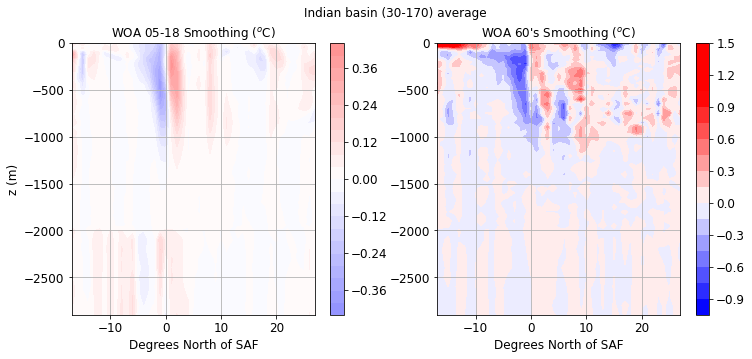

In [12]:
# Showing the effects of smoothing ... 

avgT1960s = xr.open_dataarray(foldern + 'IAP_OceanT_1955to1973.nc')
avgT2000s = xr.open_dataarray(foldern + 'IAP_OceanT_2000to2018.nc')

IAPlev = avgT1960s.depth_std

regdep = np.arange(0,44)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5)) 


lats = -65 # write these between -90 and 90
latn = -10  

lonw = 20 #write these between 0 and 359! works globally
lone = 150

depth = 3000

vmS = 0.1
vmT = 1
vmsig = 0.2

sos = 20
nos = 30

IAPlon = np.arange(lonw, lone)
wocelat = np.arange(lats+90,latn+90)
wocew = (lonw+180)%360
wocee = (lone+180)%360
if wocee<wocew:
    wocew = wocew-360
wocelon = np.arange(wocew,wocee) # no this messes up if section includes 180. There's a better way.
wocedep = np.arange(0, np.argmin(np.abs(np.array(WOA_TA.depth- depth))))

SAFy=np.interp(np.arange(lonw,lone)+0.5,orsiSAFx,orsiSAFy) # this is the problem. Let's test it. 

sf = np.array(WOA_SA.s_an.isel(time=0))
si = np.array(WOA_S5.s_an.isel(time=0)) #+ np.array(WOA_S5.s_an.isel(time=0))
sald = sf-si

tf = np.array(WOA_TA.t_an.isel(time=0))
ti = np.array(WOA_T6.t_an.isel(time=0)) #+ np.array(WOA_T5.t_an.isel(time=0))
thed = tf-ti

di = np.array(WOA_TA.t_dd.isel(time=0))
gp = np.array(WOA_T5.t_gp.isel(time=0))
oa = np.array(WOA_TA.t_oa.isel(time=0))
mn = np.array(WOA_TA.t_mn.isel(time=0))
mn6 = np.array(WOA_T6.t_mn.isel(time=0))
oa6 = np.array(WOA_T6.t_oa.isel(time=0))

IAPtf = np.array(avgT2000s.transpose('depth_std','lat','lon'))
IAPti = np.array(avgT1960s.transpose('depth_std','lat','lon'))
IAPthed = IAPtf-IAPti

sigi = gsw.sigma0(si/2, ti/2) #WOA_S6.s_an[0,wocedep,wocelat,wocelon], WOA_T6.t_an[0,wocedep,wocelat,wocelon])
sigf = gsw.sigma0(sf, tf)
sigd = sigf-sigi

WOA_theta_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_tdd_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_nodat_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
IAP_theta_str = np.zeros([len(IAPlev), sos+nos, len(IAPlon)])
WOA_tf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_sal_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_sf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_sig_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_sigf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_oa6_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])


#plot1 = np.mean(pl_cont_u[:,:,mylon],2) 
#toPl = np.diff(toPl,1)
ctr = 0
for i in np.arange(0,len(wocelon)-1):
    a = int(SAFy[i])+ 90
    #if np.nansum(di[wocedep, a-2:a+2, wocelon[i]])>100:
    
    #if np.nansum(di[wocedep, a-2:a+2, wocelon[i]])>1:
    if True: 
        WOA_theta_str[:,:,i] = oa[wocedep, a-sos:a+nos,wocelon[i]] # thed
        WOA_oa6_str[:,:,i] = oa6[wocedep, a-sos:a+nos,wocelon[i]] # thed
        WOA_tf_str[:,:,i] = tf[wocedep, a-sos:a+nos,wocelon[i]] - ti[wocedep, a-sos:a+nos,wocelon[i]] 
        ctr+=1
    else: 
        WOA_nodat_str[:,:,i] = oa[wocedep, a-sos:a+nos,wocelon[i]]
    WOA_sal_str[:,:,i] = sald[wocedep, a-sos:a+nos, wocelon[i]]
    #WOA_tdd_str[:,:,i] = di[wocedep, a-sos:a+nos, wocelon[i]]

plt.set_cmap('bwr')
#tf = np.array(WOA_TA.t_an[wocedep,wocelat,wocelon])
#ti = np.array(WOA_T6.t_an[0,wocedep,wocelat,wocelon].mean(dim='lon')) + np.array(WOA_T5.t_an[0,wocedep,wocelat,wocelon].mean(dim='lon'))
#ti =ti/2
A= axs[0].contourf(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nanmean(WOA_theta_str,2)*140/ctr, 20, vmin=-vmT, vmax=vmT)
#B = axs[1].contourf(np.arange(-sos,nos), -IAPlev, np.nanmean(IAP_theta_str,2), 20, vmin=-vmT, vmax=vmT)
#plt.set_cmap('viridis')
#B = axs[1].contourf(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nanmean(WOA_nodat_str,2) * 140/(140-ctr), 20,vmin=-vmT, vmax=vmT)
B = axs[1].contourf(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nanmean(WOA_oa6_str,2)*140/ctr, 20,vmin=-vmT, vmax=vmT)


axs[0].set_title("WOA 05-18 Smoothing ($^o$C)") # that took a while to find, equivalent to caxis in MATLAB I think 
#axs[1,0].set_title("0.5 degree shift ($^o$C)")#cb = fig.colorbar(fig,shrink = 0.5)
#axs[1,0].set_title("0.5$^o$ T shift ($^o$C)")

#axs[1].set_title("IAP Temperature change ($^o$C)")

axs[1].set_title("WOA 60's Smoothing ($^o$C)")

fig.suptitle('Indian basin (30-170) average')


axs[0].set_ylabel("z (m)", fontsize = 'large')
#axs[1,0].set_ylabel("z (m)", fontsize = 'large')
axs[1].set_xlabel("Degrees North of SAF", fontsize = 'large')
axs[0].set_xlabel("Degrees North of SAF", fontsize='large')
#axs[1,2].set_xlabel("Degrees North of SAF", fontsize='large')

Acb = fig.colorbar(A, ax=axs[0])
Bcb = fig.colorbar(B, ax=axs[1])
#Ccb = fig.colorbar(C, ax=axs[0,2])


#
labelsz = 12
Acb.ax.tick_params(labelsize=labelsz)
Bcb.ax.tick_params(labelsize=labelsz)
#Ccb.ax.tick_params(labelsize=labelsz)


# contours are for reference
print('ctr = ' + str(ctr))

for j in (0,1):
    axs[j].tick_params(axis= 'x',labelsize = labelsz)
    axs[j].tick_params(axis= 'y',labelsize = labelsz)
    axs[j].grid()
    axs[j].set_xlim(-sos+3,nos-3)

#plt.savefig('SISAZ_figures/streamline_WOAvsIAP_11-10_TS_Indian.eps')


ctr = 129


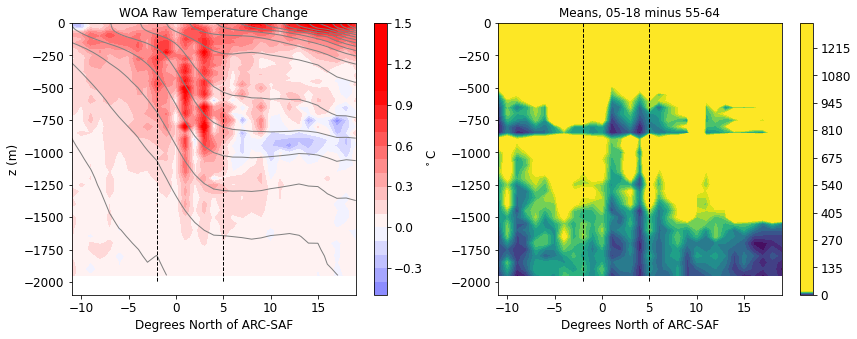

In [128]:
# Raw WOA observation data plots 

avgT1960s = xr.open_dataarray(foldern + 'IAP_OceanT_1955to1973.nc')
avgT2000s = xr.open_dataarray(foldern + 'IAP_OceanT_2000to2018.nc')

IAPlev = avgT1960s.depth_std

regdep = np.arange(0,58)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,5)) 


lats = -65 # write these between -90 and 90
latn = -10  

lonw = 20 #write these between 0 and 359! works globally
lone = 150

depth = 2000

vmS = 0.1
vmT = 1
vmsig = 0.2

sos = 12
nos = 20

IAPlon = np.arange(lonw, lone)
wocelat = np.arange(lats+90,latn+90)
wocew = (lonw+180)%360
wocee = (lone+180)%360
if wocee<wocew:
    wocew = wocew-360
wocelon = np.arange(wocew,wocee) # no this messes up if section includes 180. There's a better way.
wocedep = np.arange(0, np.argmin(np.abs(np.array(WOA_TA.depth- depth))))

#SAFy=np.interp(np.arange(lonw,lone)+0.5,orsiSAFx,orsiSAFy)

ARCSAFy=np.interp(np.arange(lonw,lone)+0.5,SJFx,SJFy) 

sf = np.array(WOA_SA.s_an.isel(time=0))
si = np.array(WOA_S5.s_an.isel(time=0)) #+ np.array(WOA_S5.s_an.isel(time=0))
sald = sf-si

tf = np.array(WOA_TA.t_an.isel(time=0))
ti = np.array(WOA_T6.t_an.isel(time=0)) #+ np.array(WOA_T5.t_an.isel(time=0)) 1965-1974 ... 
thed = tf-ti

di = np.array(WOA_T6.t_dd.isel(time=0))
gp = np.array(WOA_T5.t_gp.isel(time=0))
oa = np.array(WOA_TA.t_oa.isel(time=0))
mn = np.array(WOA_TA.t_mn.isel(time=0))
mn6 = np.array(WOA_T6.t_mn.isel(time=0))
mn5 = np.array(WOA_T5.t_mn.isel(time=0))
oa6 = np.array(WOA_T6.t_oa.isel(time=0))

IAPtf = np.array(avgT2000s.transpose('depth_std','lat','lon'))
IAPti = np.array(avgT1960s.transpose('depth_std','lat','lon'))
IAPthed = IAPtf-IAPti

sigi = gsw.sigma0(si/2, ti/2) #WOA_S6.s_an[0,wocedep,wocelat,wocelon], WOA_T6.t_an[0,wocedep,wocelat,wocelon])
sigf = gsw.sigma0(sf, tf)
sigd = sigf-sigi

WOA_theta_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_tdd_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_nodat_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
IAP_theta_str = np.zeros([len(IAPlev), sos+nos, len(IAPlon)])
WOA_tf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_t5_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_sf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_sig_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_sigf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_oa6_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])


# if there is a value for mn6, then we want mn - mn6. 
# if there's no value for mn6, then mn6 is nan and we want nan.
# is just differencing mn6 and nan enough? 

ctr = 0
for i in np.arange(0,len(wocelon)-1):
    a = int(ARCSAFy[i])+ 90
    #if np.nansum(di[wocedep, a-2:a+2, wocelon[i]])>100:
    WOA_sigf_str[:,:,i] = sigf[wocedep, a-sos:a+nos,wocelon[i]]
    #if np.nansum(mn6[wocedep, a-2:a+2, wocelon[i]])>1:
    if True:
        WOA_theta_str[:,:,i] = oa[wocedep, a-sos:a+nos,wocelon[i]] # thed
        WOA_tdd_str[:,:,i] = di[wocedep, a-sos:a+nos,wocelon[i]]
        #WOA_mn6_str[:,:,i] = oa6[wocedep, a-sos:a+nos,wocelon[i]] # thed
        WOA_t5_str[:,:,i] = mn[wocedep, a-sos:a+nos,wocelon[i]] - mn5[wocedep, a-sos:a+nos,wocelon[i]]
        WOA_tf_str[:,:,i] = mn[wocedep, a-sos:a+nos,wocelon[i]] - mn6[wocedep, a-sos:a+nos,wocelon[i]] 
        
        ctr+=1
    else: 
        WOA_nodat_str[:,:,i] = oa[wocedep, a-sos:a+nos,wocelon[i]]
    # WOA_sal_str[:,:,i] = sald[wocedep, a-sos:a+nos, wocelon[i]]
    #WOA_tdd_str[:,:,i] = di[wocedep, a-sos:a+nos, wocelon[i]]

plt.set_cmap('bwr')
#tf = np.array(WOA_TA.t_an[wocedep,wocelat,wocelon])
#ti = np.array(WOA_T6.t_an[0,wocedep,wocelat,wocelon].mean(dim='lon')) + np.array(WOA_T5.t_an[0,wocedep,wocelat,wocelon].mean(dim='lon'))
#ti =ti/2
A= axs[0].contourf(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nanmean(WOA_tf_str,2), 20, vmin=-vmT, vmax=vmT)
#B = axs[1].contourf(np.arange(-sos,nos), -IAPlev, np.nanmean(IAP_theta_str,2), 20, vmin=-vmT, vmax=vmT)
#plt.set_cmap('viridis')
#B = axs[1].contourf(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nanmean(WOA_nodat_str,2) * 140/(140-ctr), 20,vmin=-vmT, vmax=vmT)
B = axs[1].contourf(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nansum(WOA_tdd_str,2), 20,vmin=0, vmax = 20, levels = 1000, cmap= 'viridis')
axs[0].contour(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nanmean(WOA_sigf_str,2), 20 , colors = 'gray', linewidths = 1)

axs[0].set_title("WOA Raw Temperature Change") # that took a while to find, equivalent to caxis in MATLAB I think 
#axs[1,0].set_title("0.5 degree shift ($^o$C)")#cb = fig.colorbar(fig,shrink = 0.5)

axs[1].set_title("Means, 05-18 minus 55-64")
#axs[1].set_title("log10(mean data frequency)")

#fig.suptitle('Indian basin (30-170) average')


axs[0].set_ylabel("z (m)", fontsize = 'large')
#axs[1,0].set_ylabel("z (m)", fontsize = 'large')
axs[1].set_xlabel("Degrees North of ARC-SAF", fontsize = 'large')
axs[0].set_xlabel("Degrees North of ARC-SAF", fontsize='large')
#axs[1,2].set_xlabel("Degrees North of SAF", fontsize='large')

Acb = fig.colorbar(A, ax=axs[0])
Bcb = fig.colorbar(B, ax=axs[1])

#Ccb = fig.colorbar(C, ax=axs[0,2])

#
labelsz = 12
Acb.ax.tick_params(labelsize=labelsz)
Bcb.ax.tick_params(labelsize=labelsz)
#Ccb.ax.tick_params(labelsize=labelsz)
Acb.set_label("$^\circ$C",fontsize = 'large')

# contours are for reference
print('ctr = ' + str(ctr))

for j in (0,1):
    axs[j].tick_params(axis= 'x',labelsize = labelsz)
    axs[j].tick_params(axis= 'y',labelsize = labelsz)
    #axs[j].grid()
    axs[j].set_xlim(-sos+1,nos-1)
    axs[j].plot(0*IAPlev-2, -IAPlev, linestyle='dashed', color='black', linewidth = 1)
    axs[j].plot(0*IAPlev+5, -IAPlev, linestyle='dashed', color='black', linewidth = 1)

    
## yeah I really want to overlay a scatter. Basically it would say, for each of the things, if it's greater, plot. 
#msms = np.nansum(WOA_tdd_str,2)
#for k in np.arange(sos+nos):
#    for m in wocedep:
#        if msms[m,k]>30:
#            axs[0].scatter(k-sos, -WOA_TA.depth[m], c='black')
#
##plt.savefig('SISAZ_figures/streamline_WOAvsIAP_11-10_TS_Indian.eps')
#

NameError: name 'wocedep' is not defined

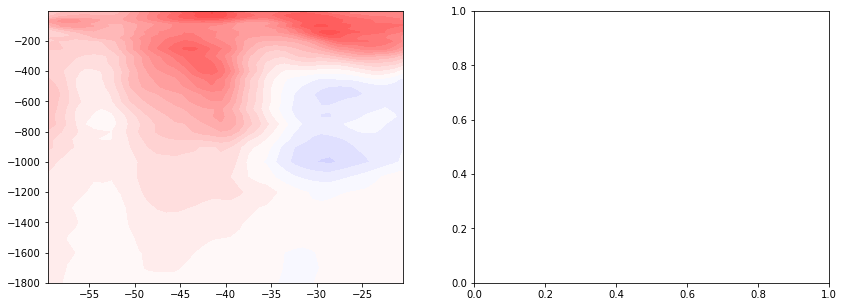

In [123]:
### Now I want to plot a zonal average one ... and also a 1 degree shift which is not difficult but does require brain.

## first the zonal average. Umm ... 

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,5)) 

#avgT1960s = xr.open_dataarray(foldern + 'IAP_OceanT_1955to1973.nc')
#avgT2000s = xr.open_dataarray(foldern + 'IAP_OceanT_2000to2018.nc')

IAPlev = avgT1960s.depth_std

lats = -60 # write these between -90 and 90
latn = -20

lonw = 20 #write these between 0 and 360, sorry!
lone = 150

depth = 2000

vm = 0.05
vmT = 3
vmc = 0.2

# pick actual latitudes
lonmax = [80, 360, 360, 360, 360]
lonmin = [-280, 0, 0,0,0]

wocelat = np.arange(lats+90,latn+90)
wocew = lonw
wocee = lone
if wocee<wocew:
    wocew = wocew-360
wocelon = np.arange(wocew,wocee) # no this messes up if section includes 180. There's a better way.

depfile = avgT1960s.depth_std
IAPdep = np.arange(0, np.argmin(np.abs(np.array(depfile - depth))))



plt.set_cmap('bwr')
tf = np.array(avgT2000s[wocelat,wocelon,IAPdep].mean(dim='lon'))
ti = np.array(avgT1960s[wocelat,wocelon,IAPdep].mean(dim='lon')) 

A= axs[0].contourf( WOA_TA.lat[wocelat], -depfile[IAPdep] , np.transpose(tf-ti),20, vmin=-1, vmax=1)

#tdif = xr.DataArray(np.diff(ti,1))
#wocediflat =  np.arange(lats+90,latn+89)# +91, +90 looks better for what it's worth! 
#wocediflat = wocediflat
#B= axs[1].contourf(WOA_TA.lat[wocediflat], -WOA_TA.depth[wocedep], 0.5*tdif,20, vmin=-1, vmax=1)
#toPl3 = np.mean(pl_heat_theta[:,:,mylon]- pl_cont_theta[:,:,mylon],2)
#C = axs[1,0].contourf(yy, zz, toPl3[regdep,mylat] ,vmin=-vmT, vmax=vmT, levels = 20)

sigi = gsw.density.sigma0(WOA_SA.s_an[0,wocedep,wocelat,wocelon], WOA_TA.t_an[0,wocedep,wocelat,wocelon])
#axs[0].contour(WOA_TA.lat[wocelat], -WOA_TA.depth[wocedep], np.mean(sigi,2),np.linspace(25, 28, 12), colors='green')
axs[1].contour(WOA_TA.lat[wocelat], -WOA_TA.depth[wocedep], np.mean(sigi,2),np.linspace(25, 28, 12), colors='green')



#axs[0].contour(yy, zz, np.mean(all_sig0[regdep,mylat,mylon],2),np.linspace(23, 28, 20), colors='green')
#axs[0,0].set_title("Observed Heating ($^o$C)") # Need to check the actual latitude. 
axs[0].set_title("Observed Heating, Indian ($^o$C)") # that took a while to find, equivalent to caxis in MATLAB I think 
#axs[1,0].set_title("0.5 degree shift ($^o$C)")#cb = fig.colorbar(fig,shrink = 0.5)
#axs[1].set_title("0.5 degree shift, Indian ($^o$C)")
#axs[2,1].set_title("\'u\' change from Passive Heat" )

axs[0].set_ylabel("z (m)", fontsize = 'large')
axs[1].set_xlabel("Degrees South", fontsize = 'large')
axs[0].set_xlabel("Degrees South", fontsize='large')

Acb = fig.colorbar(A, ax=axs[0])
#Bcb = fig.colorbar(B, ax=axs[0,1])
#Ccb = fig.colorbar(C, ax=axs[1,0])
#Dcb = fig.colorbar(D, ax=axs[1,1])
#
#Bcb.set_label("$^\circ$C",fontsize = 'large')
#Dcb.set_label("$^\circ$C",fontsize = 'large')

#
#labelsz = 12
#Acb.ax.tick_params(labelsize=labelsz)
#Bcb.ax.tick_params(labelsize=labelsz)
#Ccb.ax.tick_params(labelsize=labelsz)
#Dcb.ax.tick_params(labelsize=labelsz)
#
#
## contours are for reference
#for i in (0,1):
#    for j in (0,1):
#        axs[i,j].tick_params(axis= 'x',labelsize = labelsz)
#        axs[i,j].tick_params(axis= 'y',labelsize = labelsz)
##
##plt.savefig('SISAZ_figures/1_deg_shift_5-11.eps')
#
#

    
    

In [15]:
### ok now something slightly more complicated, but also recently done ... streamline 1 degree shift. 



NameError: name 'WOA_sigf_str' is not defined

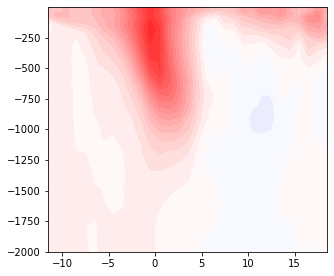

In [124]:
# shifted for IAP

# has to do with the funky latitude coordinate - inconsistency between IAP and WOA. 

regdep = np.arange(0,44)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5,4.5)) 


lats = -70 # write these between -90 and 90
latn = 0  

lonw = 20 #write these between 0 and 360, sorry!
lone = 150

depth=2000

vm = 0.05
vmT = 3
vmc = 0.2

sos = 12
nos = 20


wocelat = np.arange(lats+90,latn+90)
wocew = lonw
wocee = lone
if wocee<wocew:
    wocew = wocew-360
wocelon = np.arange(wocew,wocee) # no this messes up if section includes 180. There's a better way.
wocedep = np.arange(0, np.argmin(np.abs(np.array(WOA_TA.depth- depth))))

depfile = avgT1960s.depth_std
IAPdep = np.arange(0, 41)#np.argmin(np.abs(np.array(depfile - depth))))


SAFy=np.interp(wocelon+0.5,SJFx,SJFy)

sf = np.array(WOA_SA.s_an.isel(time=0))
si = np.array(WOA_S6.s_an.isel(time=0)) + np.array(WOA_S5.s_an.isel(time=0))
sald = sf-si/2

tf = np.array(avgT2000s[wocelat,wocelon,IAPdep])
ti = np.array(avgT1960s[wocelat,wocelon,IAPdep]) 
#thed = tf-ti/2

IAP_theta_str = np.zeros([sos+nos, len(wocelon), len(IAPdep),])
IAP_tf_str = np.zeros([sos+nos, len(wocelon),len(IAPdep)])

#plot1 = np.mean(pl_cont_u[:,:,mylon],2) 
#toPl = np.diff(toPl,1)

for i in np.arange(0,len(wocelon)-1):
    a = int(SAFy[i])+70
    #WOA_sal_str[:,:,i] = sald[wocedep, a-sos:a+nos, wocelon[i]]
    #IAP_theta_str[:,:,i] = thed[wocedep, a-sos:a+nos,wocelon[i]]
    #WOA_sig_str[:,:,i] = sigd[regdep, a-sos:a+nos,wocelon[i]]
    #WOA_sf_str[:,:,i] = sf[regdep, a-sos:a+nos, wocelon[i]]
    IAP_tf_str[:,i,:] = tf[a-sos:a+nos, i, :]


plt.set_cmap('bwr')
#tf = np.array(WOA_TA.t_an[wocedep,wocelat,wocelon])
#ti = np.array(WOA_T6.t_an[0,wocedep,wocelat,wocelon].mean(dim='lon')) + np.array(WOA_T5.t_an[0,wocedep,wocelat,wocelon].mean(dim='lon'))
#ti =ti/2

plt.set_cmap('bwr')


#A= axs.contourf(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nanmean(WOA_theta_str[:,:,wocelon],2),20, vmin=-1, vmax=1)

tdif = np.diff(np.nanmean(IAP_tf_str,1),1, axis=0)
#wocediflat =  np.arange(lats+90,latn+89)
A= axs.contourf(np.arange(-sos+0.5,nos-0.5), -depfile[IAPdep], 0.5*np.transpose(tdif), 20, vmin=-1, vmax=1)
axs.contour(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nanmean(WOA_sigf_str,2), 20 , colors = 'gray', linewidths = 1)


#sigi = gsw.density.sigma0(WOA_SA.s_an[0,wocedep,wocelat,wocelon], WOA_TA.t_an[0,wocedep,wocelat,wocelon])
#axs[0,1].contour(WOA_TA.lat[wocelat], -WOA_TA.depth[wocedep], np.mean(sigi,2),np.linspace(25, 28, 12), colors='green')
#axs[1,1].contour(WOA_TA.lat[wocelat], -WOA_TA.depth[wocedep], np.mean(sigi,2),np.linspace(25, 28, 12), colors='green')



#axs[0].contour(yy, zz, np.mean(all_sig0[regdep,mylat,mylon],2),np.linspace(23, 28, 20), colors='green')
#axs[0,0].set_title("Observed Heating ($^o$C)") # Need to check the actual latitude. 
#axs[0,1].set_title("Observed Heating, Indian ($^o$C)") # that took a while to find, equivalent to caxis in MATLAB I think 
#axs[1,0].set_title("0.5 degree shift ($^o$C)")#cb = fig.colorbar(fig,shrink = 0.5)
axs.set_title("0.5 degree shift, Indian ($^o$C)")
#axs[2,1].set_title("\'u\' change from Passive Heat" )

axs.set_ylabel("z (m)", fontsize = 'large')
axs.set_xlabel("Degrees North of ARC-SAF", fontsize='large')

Acb = fig.colorbar(A)

Acb.set_label("$^\circ$C",fontsize = 'large')
#cb.set_label("$^\circ$C",fontsize = 'large')

#
labelsz = 12
Acb.ax.tick_params(labelsize=labelsz)
#axs.grid()
#Bcb.ax.tick_params(labelsize=labelsz)
#Ccb.ax.tick_params(labelsize=labelsz)
#Dcb.ax.tick_params(labelsize=labelsz)
#
#
## contours are for reference
#for i in (0,1):
#    for j in (0,1)
axs.tick_params(axis= 'x',labelsize = labelsz)
axs.tick_params(axis= 'y',labelsize = labelsz)

axs.set_ylim(-2000,0)
axs.set_xlim(-11,19)
##
#plt.savefig('SISAZ_figures/1_deg_shift_streamline_5-11.eps')


#axs[j].set_xlim(-sos+1,nos-1)
axs.plot(0*IAPlev-3, -IAPlev, linestyle='dashed', color='black', linewidth = 1)
axs.plot(0*IAPlev+5, -IAPlev, linestyle='dashed', color='black', linewidth = 1)

plt.text

Text(0.05, 0.9, 'a')

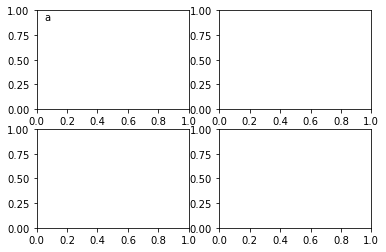

In [17]:
fig, axs = plt.subplots(nrows = 2, ncols = 2)
axs[0,0].text(0.05, 0.9, 'a', transform = axs[0,0].transAxes)

## Argo Weddell checkout

In [ ]:
# look at the anomalies. Plot them over a few months. 
# First let's grab one dataset and look at it. 
# clearly it would be easiest to concatentate these files in xarray. 

In [184]:
ArT_401 = xr.open_dataset('/nfs/data/RG_Argo_Climatology/extensions/RG_ArgoClim_202401_2019.nc',decode_times=False)
ArT_402 = xr.open_dataset('/nfs/data/RG_Argo_Climatology/extensions/RG_ArgoClim_202402_2019.nc',decode_times=False)
ArT_403 = xr.open_dataset('/nfs/data/RG_Argo_Climatology/extensions/RG_ArgoClim_202403_2019.nc',decode_times=False)
ArT_404 = xr.open_dataset('/nfs/data/RG_Argo_Climatology/extensions/RG_ArgoClim_202404_2019.nc',decode_times=False)
ArT_405 = xr.open_dataset('/nfs/data/RG_Argo_Climatology/extensions/RG_ArgoClim_202405_2019.nc',decode_times=False)
ArT_406 = xr.open_dataset('/nfs/data/RG_Argo_Climatology/extensions/RG_ArgoClim_202406_2019.nc',decode_times=False)
ArT_407 = xr.open_dataset('/nfs/data/RG_Argo_Climatology/extensions/RG_ArgoClim_202407_2019.nc',decode_times=False)
ArT_310 = xr.open_dataset('/nfs/data/RG_Argo_Climatology/extensions/RG_ArgoClim_202310_2019.nc',decode_times=False)
ArT_311 = xr.open_dataset('/nfs/data/RG_Argo_Climatology/extensions/RG_ArgoClim_202311_2019.nc',decode_times=False)
ArT_312 = xr.open_dataset('/nfs/data/RG_Argo_Climatology/extensions/RG_ArgoClim_202312_2019.nc',decode_times=False)


In [186]:
ART_4012 = xr.concat(objs = [ ArT_310, ArT_311 , ArT_312, ArT_401,ArT_402, ArT_403 ,ArT_404,ArT_405,ArT_406, ArT_407], dim='TIME')
# it's hard to concatenate this to the main one because of the issue of 'ARGO_TEMPERATURE_MEAN' not present.

In [183]:
# now just plot ART_4012 which is more or less what I'm interested in

<xarray.Dataset>
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58, TIME: 2)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) float64 240.5 241.5
Data variables:
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 1...
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 -...

In [199]:
wedlon = np.concatenate([np.arange(-70,0),np.arange(0,40)])

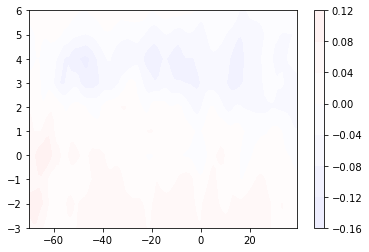

In [278]:
wedt = ART_4012.ARGO_TEMPERATURE_ANOMALY.isel(LONGITUDE = wedlon, LATITUDE=range(11))
plt.contourf( wedlon, range(-3,7), wedt.isel(PRESSURE = 8).mean('LATITUDE'), vmin = -2, vmax = 2)
plt.colorbar()

In [293]:
#wedlon = np.concatenate([np.arange(-70,0),np.arange(0,40)])
wedlon = np.concatenate([np.arange(-70,0),np.arange(0,290)])

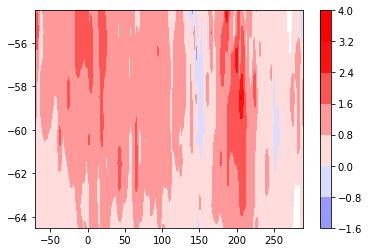

In [307]:
wedt = ART_4012.ARGO_TEMPERATURE_ANOMALY.isel(LONGITUDE = wedlon, LATITUDE=range(11))
plt.contourf(wedlon, wedt.LATITUDE, wedt.isel(PRESSURE = 10, TIME = 7), vmin= -3, vmax = 3)
plt.colorbar()

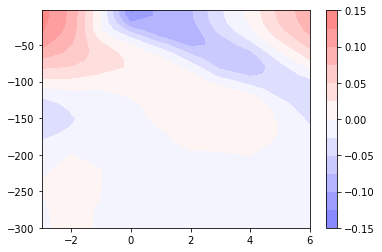

In [288]:
# we want to look at over these past year, what is the propagation of the anomaly in depth space. 

wedt = ART_4012.ARGO_SALINITY_ANOMALY.isel(LONGITUDE = wedlon, LATITUDE=range(11))
plt.contourf( range(-3,7), -wedt.PRESSURE.isel(PRESSURE=range(25)), wedt.isel(PRESSURE=range(25)).mean('LATITUDE').mean('LONGITUDE').transpose(), vmin = -0.3, vmax = 0.3, levels=12)
plt.colorbar()

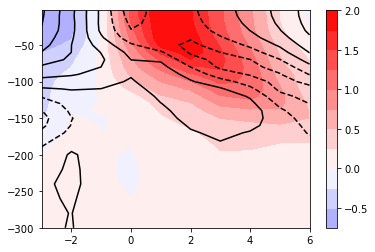

In [313]:
# we want to look at over these past year, what is the propagation of the anomaly in depth space.

# what is the spatial coherence of this thing? let's test some different areas?

# First let's look circumpolar. 
#wedlon = np.concatenate([np.arange(-,0),np.arange(0,290)])
wedlon = np.concatenate([np.arange(-20,40)])#,np.arange(0,290)])

wedt = ART_4012.ARGO_TEMPERATURE_ANOMALY.isel(LONGITUDE = wedlon, LATITUDE=range(11))
plt.contourf( range(-3,7), -wedt.PRESSURE.isel(PRESSURE=range(25)), wedt.isel(PRESSURE=range(25)).mean('LATITUDE').mean('LONGITUDE').transpose(), vmin = -2, vmax = 2, levels=12)
plt.colorbar()

weds = ART_4012.ARGO_SALINITY_ANOMALY.isel(LONGITUDE = wedlon, LATITUDE=range(11))
plt.contour( range(-3,7), -wedt.PRESSURE.isel(PRESSURE=range(25)), weds.isel(PRESSURE=range(25)).mean('LATITUDE').mean('LONGITUDE').transpose(), vmin = -0.3, vmax = 0.3, levels=6, colors= 'k')

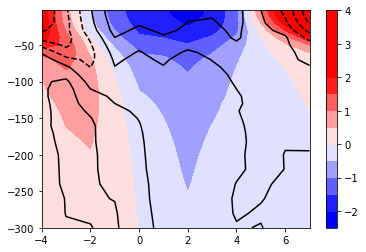

In [366]:
# we want to look at previous years in the RG climatology
# what is the propagation of a typical anomaly in depth space?

# Ok it appears that there is basically not a useful annual cycle that the anomalies are subtracted from??


# First let's look circumpolar. 
wedlon = np.concatenate([np.arange(-70,0),np.arange(0,0)])
#wedlon = np.concatenate([np.arange(-20,40)])#,np.arange(0,290)])

yr = 8
pd = range(12*yr-4,12*yr+8)
myr = range(-4,8) # this means that Jan = 0 I believe? 
mylat= np.arange(120,130) # this is quite far north! 

wedt = ArT.ARGO_TEMPERATURE_ANOMALY.isel(TIME = pd, LONGITUDE = wedlon, LATITUDE=mylat)
plt.contourf(myr, -wedt.PRESSURE.isel(PRESSURE=range(25)), wedt.isel(PRESSURE=range(25)).mean('LATITUDE').mean('LONGITUDE').transpose(), vmin = -2, vmax = 2, levels=12)
plt.colorbar()

weds = ArS.ARGO_SALINITY_ANOMALY.isel(TIME = pd, LONGITUDE = wedlon, LATITUDE=mylat)
plt.contour( myr, -wedt.PRESSURE.isel(PRESSURE=range(25)), weds.isel(PRESSURE=range(25)).mean('LATITUDE').mean('LONGITUDE').transpose(), vmin = -0.3, vmax = 0.3, levels=6, colors= 'k')

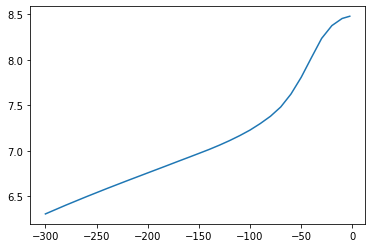

In [365]:
# Now we can see that this is mostly the seasonal cycle! Let's subtract that ... this is easy. 
# I just need to take the mean of the anomalies from each month until 2023. Ok. 
# Then I will subtract that. 
# I would typically just reshape a numpy array? Let's do this in a valid xarray way though? 
# I feel dumb. That's OK! I'm learning. 
# define a coordinate that is TIME%12



# Ok it appears that there is basically not a useful annual cycle that the anomalies are subtracted from??


# First let's look circumpolar. 
wedlon = np.concatenate([np.arange(-70,0),np.arange(0,0)])
#wedlon = np.concatenate([np.arange(-20,40)])#,np.arange(0,290)])

yr = 8
pd = range(12*yr-4,12*yr+8)
myr = range(-4,8) # this means that Jan = 0 I believe? 
mylat= np.arange(120,130)

wedt = ArT.ARGO_TEMPERATURE_MEAN.isel( LONGITUDE = wedlon, LATITUDE=mylat)
plt.plot( -wedt.PRESSURE.isel(PRESSURE=range(25)), wedt.isel(PRESSURE=range(25)).mean('LATITUDE').mean('LONGITUDE'))
#plt.colorbar()

#weds = ArS.ARGO_SALINITY_ANOMALY.isel(TIME = pd, LONGITUDE = wedlon, LATITUDE=mylat)
#plt.contour( myr, -wedt.PRESSURE.isel(PRESSURE=range(25)), weds.isel(PRESSURE=range(25)).mean('LATITUDE').mean('LONGITUDE').transpose(), vmin = -0.3, vmax = 0.3, levels=6, colors= 'k')

In [374]:
tst = ArT.ARGO_TEMPERATURE_ANOMALY.isel(LATITUDE = 20, LONGITUDE = 20) 
# here I am learning a new language, so I feel dumb for a little bit. Let's work through it and get somewhere! Great. 

tst2 = tst.expand_dims('Month')
# basically I want to create a new dataset with myT as the new coordinate. 
# Better yet, I would want to simply re-index the coordinate TIME with my new values. 

In [386]:
# I could convert the values of the TIME coordinate to datetime64 values. That would be really useful. 

import pandas as pd


#attrs = {"units":"months since 2004-01-01"}
#ds = xr.Dataset({"time": ("time", [0,1,2], attrs)})

#tst2.Month = tst2.TIME%12

In [394]:
myT = pd.date_range("2004-01-01", freq='m', periods = 237)


In [403]:
# here trying to create a new DataArray. 
myds = xr.DataArray(tst.data, coords = [("Month", myT), ("PRESSURE", tst.PRESSURE.data) ])

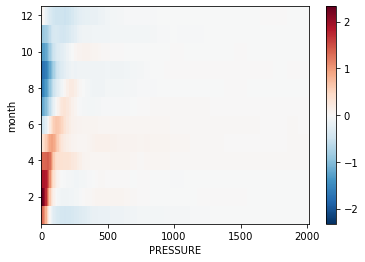

In [406]:
tstclim = myds.groupby("Month.month").mean()
tstclim.plot()

In [415]:
ArTf = xr.DataArray(ArT.ARGO_TEMPERATURE_ANOMALY.data, coords = [("month", myT), ("PRESSURE", tst.PRESSURE.data), ("LATITUDE", ArT.LATITUDE.data), ("LONGITUDE", ArT.LONGITUDE.data)])

In [411]:
ArTclim = ArTf.isel(Month = range(0,228)).groupby("Month.month").mean()

In [443]:
climtime

<xarray.DataArray 'TIME' (TIME: 12)>
array([  0, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1])
Coordinates:
  * TIME     (TIME) float32 215.5 216.5 217.5 218.5 ... 223.5 224.5 225.5 226.5

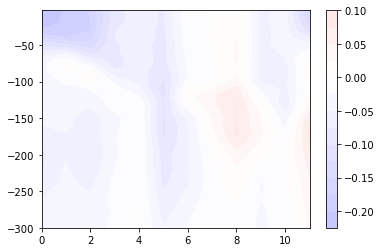

In [484]:
# we want to look at over these past year, what is the propagation of the anomaly in depth space? 
# We first want to find the anomaly at all! This is challenging, because we have to remove the seasonal cycle. 


wedlon = np.concatenate([np.arange(0,360)])#,np.arange(0,290)])

#wedt = ART_4012.ARGO_TEMPERATURE_ANOMALY.isel(LONGITUDE = wedlon, LATITUDE=range(11))
yr = 7 # 2022 is 18, 2004 is 0. 2023 is not complete, but would be 19. 

wedtraw = ArT.ARGO_TEMPERATURE_ANOMALY.isel(TIME = np.arange(yr*12, yr*12+12), LONGITUDE = wedlon, LATITUDE=range(11)).mean('LATITUDE').mean('LONGITUDE')
climtime = wedtraw.TIME%12 -0.5
climtime = climtime.astype('int')
wedtclim = ArTclim.isel(month = climtime.data, LONGITUDE = wedlon, LATITUDE=range(11)).mean('LATITUDE').mean('LONGITUDE')
wedtrawf = xr.DataArray(wedtraw.data, coords = [("month", ArTclim.month.data), ("PRESSURE", ArT.PRESSURE.data)])

wedtan = wedtrawf - wedtclim
plt.contourf(range(0,12), -wedt.PRESSURE.isel(PRESSURE=range(25)), wedtan.isel(PRESSURE=range(25)).transpose(), vmin = -1, vmax = 1, levels=12)
plt.colorbar()

#weds = ART_4012.ARGO_SALINITY_ANOMALY.isel(LONGITUDE = wedlon, LATITUDE=range(11))
#plt.contour( range(-3,7), -wedt.PRESSURE.isel(PRESSURE=range(25)), weds.isel(PRESSURE=range(25)).mean('LATITUDE').mean('LONGITUDE').transpose(), vmin = -0.3, vmax = 0.3, levels=6, colors= 'k')

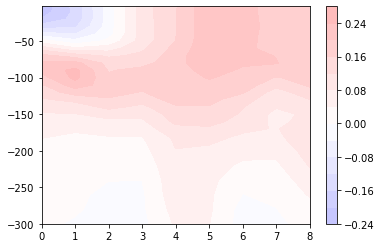

In [465]:
# we want to look at over these past year, what is the propagation of the anomaly in depth space? 
# We first want to find the anomaly at all! This is challenging, because we have to remove the seasonal cycle. 


wedlon = np.concatenate([np.arange(0,360)])#,np.arange(0,290)])

#wedt = ART_4012.ARGO_TEMPERATURE_ANOMALY.isel(LONGITUDE = wedlon, LATITUDE=range(11))
yr = 19 # 2022 is 18, 2004 is 0. 2023 is not complete, but would be 19. 
nmon = 9

wedtraw = ArT.ARGO_TEMPERATURE_ANOMALY.isel(TIME = np.arange(yr*12, yr*12+nmon), LONGITUDE = wedlon, LATITUDE=range(11)).mean('LATITUDE').mean('LONGITUDE')
climtime = wedtraw.TIME%12 -0.5
climtime = climtime.astype('int')
wedtclim = ArTclim.isel(month = climtime.data[0:nmon], LONGITUDE = wedlon, LATITUDE=range(11)).mean('LATITUDE').mean('LONGITUDE')
wedtrawf = xr.DataArray(wedtraw.data, coords = [("month", ArTclim.month.data[0:nmon]), ("PRESSURE", ArT.PRESSURE.data)])

wedtan = wedtrawf - wedtclim
plt.contourf(range(0,nmon), -wedt.PRESSURE.isel(PRESSURE=range(25)), wedtan.isel(PRESSURE=range(25)).transpose(), vmin = -1, vmax = 1, levels=12)
plt.colorbar()

#weds = ART_4012.ARGO_SALINITY_ANOMALY.isel(LONGITUDE = wedlon, LATITUDE=range(11))
#plt.contour( range(-3,7), -wedt.PRESSURE.isel(PRESSURE=range(25)), weds.isel(PRESSURE=range(25)).mean('LATITUDE').mean('LONGITUDE').transpose(), vmin = -0.3, vmax = 0.3, levels=6, colors= 'k')

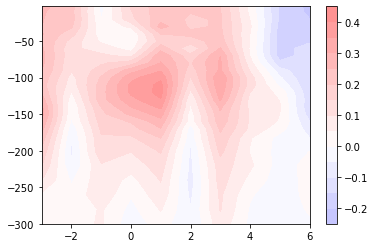

In [502]:
# Now the big money one - the most recent additional months, also minus the climatology. 

wedlon = np.concatenate([np.arange(-70,-50)])

#wedt = ART_4012.ARGO_TEMPERATURE_ANOMALY.isel(LONGITUDE = wedlon, LATITUDE=range(11))
#yr = 19 # 2022 is 18, 2004 is 0. 2023 is not complete, but would be 19. 
# quck and dirty: let's just get a file that has all the anomalies. Who cares about the time coordinate? 


wedtraw = ART_4012.ARGO_TEMPERATURE_ANOMALY.isel(LONGITUDE = wedlon, LATITUDE=range(11)).mean('LATITUDE').mean('LONGITUDE')
climtime = wedtraw.TIME%12 -0.5
climtime = climtime.astype('int')
wedtclim = ArTclim.isel(month = climtime.data, LONGITUDE = wedlon, LATITUDE=range(11)).mean('LATITUDE').mean('LONGITUDE')
wedtrawf = xr.DataArray(wedtraw.data, coords = [("month", wedtclim.month.data), ("PRESSURE", ArT.PRESSURE.data)])

wedtan234 = wedtrawf - wedtclim
plt.contourf(range(-3,7), -wedt.PRESSURE.isel(PRESSURE=range(25)), wedtan234.isel(PRESSURE=range(25)).transpose(), vmin = -1, vmax = 1, levels=12)
plt.colorbar()

#weds = ART_4012.ARGO_SALINITY_ANOMALY.isel(LONGITUDE = wedlon, LATITUDE=range(11))
#plt.contour( range(-3,7), -wedt.PRESSURE.isel(PRESSURE=range(25)), weds.isel(PRESSURE=range(25)).mean('LATITUDE').mean('LONGITUDE').transpose(), vmin = -0.3, vmax = 0.3, levels=6, colors= 'k')


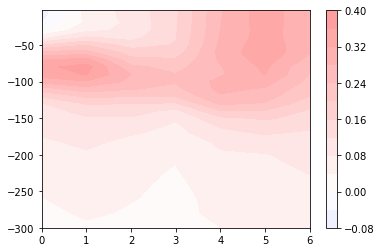

In [478]:
# Checking just the part in 2024. 

wedlon = np.concatenate([np.arange(0,360)])#,np.arange(0,290)])

#wedt = ART_4012.ARGO_TEMPERATURE_ANOMALY.isel(LONGITUDE = wedlon, LATITUDE=range(11))
#yr = 19 # 2022 is 18, 2004 is 0. 2023 is not complete, but would be 19. 
# quck and dirty: let's just get a file that has all the anomalies. Who cares about the time coordinate? 


wedtraw = ART_4012.ARGO_TEMPERATURE_ANOMALY.isel(TIME = range(3, 10), LONGITUDE = wedlon, LATITUDE=range(11)).mean('LATITUDE').mean('LONGITUDE')
#climtime = wedtraw.TIME%12 -0.5
#climtime = climtime.astype('int')
wedtclim = ArTclim.isel(month = np.arange(0,7), LONGITUDE = wedlon, LATITUDE=range(11)).mean('LATITUDE').mean('LONGITUDE')
wedtrawf = xr.DataArray(wedtraw.data, coords = [("month", np.arange(1,8)), ("PRESSURE", ArT.PRESSURE.data)])

wedtan = wedtrawf - wedtclim
plt.contourf(range(7), -wedt.PRESSURE.isel(PRESSURE=range(25)), wedtan.isel(PRESSURE=range(25)).transpose(), vmin = -1, vmax = 1, levels=12)
plt.colorbar()

#weds = ART_4012.ARGO_SALINITY_ANOMALY.isel(LONGITUDE = wedlon, LATITUDE=range(11))
#plt.contour( range(-3,7), -wedt.PRESSURE.isel(PRESSURE=range(25)), weds.isel(PRESSURE=range(25)).mean('LATITUDE').mean('LONGITUDE').transpose(), vmin = -0.3, vmax = 0.3, levels=6, colors= 'k')

# this may be quite wrong! But I do see some major T anomalies, so that's exciting! 

In [490]:
## Great this is super exciting!! So there's some giant anomalies for sure. 

# I see why I'm doing what I'm doing... need to change the code. Better to just do this correctly next time around. 


# I think I should be able to concatenate the datasets with climatology subtracted, each with date-time month applied. 
# Just make a new xarray, not that hard I think. Worth trying now? Not sure ... 


<xarray.DataArray 'month' (month: 12)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

TypeError: 'GeoAxesSubplot' object is not subscriptable

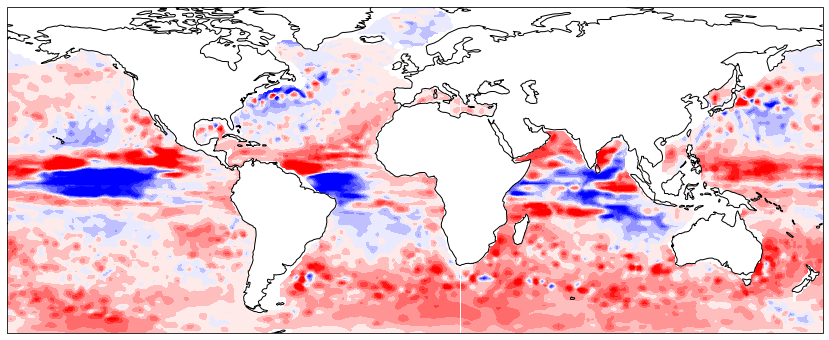

In [210]:
fig,axs = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
axs = plt.axes(projection=ccrs.PlateCarree())
axs.coastlines()

reglat = np.arange(90,170)
reglon =np.arange(90,180) # 270,360 for kuroshio
mydep = np.arange(36,57)
#clims = [-5e9, 5e9]
plt.set_cmap('bwr')

toPl2 = ART_4012.ARGO_TEMPERATURE_ANOMALY.isel(TIME=7).isel(PRESSURE=10) 
#toPl2 = np.log(toPl2)


#toPl3 = WOA_T6.t_oa.isel(time=0).isel(depth=mydep).mean('depth') 
#toPl3 = np.log(toPl3)

#lon = WOA_T6.lon
#lat = WOA_T6.lat

Q = axs.contourf(ART_4012.LONGITUDE, ART_4012.LATITUDE, toPl2, #- toPl2[reglat,reglon], 
          transform=ccrs.PlateCarree(), vmin =-3, vmax = 3,levels =35 )
#Q = axs[1].contourf(lon[reglon], lat[reglat], toPl2[reglat,reglon] , 
         # transform=ccrs.PlateCarree(), vmin =0, vmax = 10,levels =35 )

#gl = axs[0].gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
plt.colorbar(Q)

## Using Argo observations instead of the long-term obs. 

In [174]:
# What if we replace WOA obs with Argo observations? How does this change things? I think it's possible. 
# First load Argo. Then repeat the above codes. 

ArT = xr.open_dataset('/nfs/data/RG_Argo_Climatology/RG_ArgoClim_Temp.nc',decode_times=False)
#m3 = ArT.ARGO_TEMPERATURE_ANOMALY.isel(TIME=np.arange(24,237)).polyfit(dim='TIME', deg=1)


In [176]:
ArT.ARGO_TEMPERATURE_ANOMALY.TIME

<xarray.DataArray 'TIME' (TIME: 237)>
array([  0.5,   1.5,   2.5, ..., 234.5, 235.5, 236.5], dtype=float32)
Coordinates:
  * TIME     (TIME) float32 0.5 1.5 2.5 3.5 4.5 ... 233.5 234.5 235.5 236.5
Attributes:
    units:        months since 2004-01-01 00:00:00
    time_origin:  01-JAN-2004 00:00:00
    axis:         T

In [ ]:
#np.array(m3.sel(degree=1).polyfit_coefficients).shape
meanT = np.array(ArT.ARGO_TEMPERATURE_MEAN)
meanT.shape


In [317]:
ArS = xr.open_dataset('RG_ArgoClim_Psal.nc',decode_times=False)
ArSm = ArS.ARGO_SALINITY_MEAN
ArTm = ArT.ARGO_TEMPERATURE_MEAN
ArSigm = gsw.sigma0(ArSm,ArTm)

In [ ]:
ArSigmar = np.array(ArSigm)
ArSigmar.shape

In [ ]:
ArSigm.LATITUDE

In [ ]:
## what's happening here is that I'm getting zonal geostrophic velocity from Argo! 
import numpy.ma as ma 
dep_u = (np.array(ArgoPres[0:-1]) + np.array(ArgoPres[1:]))/2 
dep_u = np.append([0],dep_u)
lat_u = np.arange(-64, 80) # 


sigdiff = ArSigm.diff('LATITUDE')
sigdiff = np.array(sigdiff)
#alpha = gsw.alpha(pl_heat_sal[:,mylat,mylon], pl_cont_theta[:,mylat,mylon], depfile)
deltau = 0*sigdiff
dz  = np.append(np.diff(dep_u),[100])
f = np.expand_dims(np.array(1.4e-4*np.sin(lat_u*np.pi/180)),1)


for zc in np.arange(57,-1,-1): 
    #print("asdf")
    deltau[zc,:,:] =  dz[zc]* sigdiff[zc,:,:] * 9.81/(f * 111000)/1000 
    # can use this for loop as long as I can just test each one to see if it's a nan. 
    #pl_heat_delu[zc,:,:] = pl_heat_delu[zc+1,:,:] + dz[zc] * alpha[zc,:,:] * tdif[zc,:,:] * 9.81 /( f[mylat,mylon] * 111000)
    # I think I should just cumsum my test_accel, and that would give the same ... 
    #Dz can probably be just np.diff(depfile). Dy = 111000*np.diff(latfile[mylat, mylon]). F = 1.4e-4* sin (latfile). 
nice3 = deltau[::-1,:,:] # does this read it backwards? I think so ... 
nice3cum = np.nancumsum(nice3,axis=0) # this is a little better! 
#IAP_geoU_1965_74 = ma.masked_equal(nice3cum[::-1,:,:], 0)
Argo_geoUm = ma.masked_equal(nice3cum[::-1,:,:], 0)

In [ ]:
Argo_geoUm.shape

In [ ]:
## rewriting this code to make it for m3, which is Argo T anomaly trend. 

ArgoPres = ArT.PRESSURE


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,5)) 

# useless
lats = -65 # write these between -90 and 90
latn = -10  

#good
lonw = 20 #write these between 0 and 359! works globally
lone = 150

depth = 2000

vmS = 0.1
vmT = 0.3
vmsig = 0.2

sos = 7
nos = 20

Argolon = np.arange(lonw-20, lone-20)
#wocelat = np.arange(lats+90,latn+90)
#wocew = (lonw+180)%360
#wocee = (lone+180)%360
#if wocee<wocew:
#    wocew = wocew-360
#wocelon = np.arange(wocew,wocee) # no this messes up if section includes 180. There's a better way.
#wocedep = np.arange(0, np.argmin(np.abs(np.array(WOA_TA.depth- depth))))

# SAFy=np.interp(np.arange(lonw,lone)+0.5,orsiSAFx,orsiSAFy) 
ARCSAFy=np.interp(np.arange(lonw,lone)+0.5,SJFx,SJFy) 


#sf = np.array(WOA_SA.s_an.isel(time=0))
#si = np.array(WOA_S6.s_an.isel(time=0)) + np.array(WOA_S5.s_an.isel(time=0))
#sald = sf-si/2

#tf = np.array(WOA_TA.t_an.isel(time=0))
#ti = np.array(WOA_T6.t_an.isel(time=0)) + np.array(WOA_T5.t_an.isel(time=0))
#thed = tf-ti/2


#IAPtf = np.array(avgT2000s.transpose('depth_std','lat','lon'))
#IAPti = np.array(avgT1960s.transpose('depth_std','lat','lon'))
#IAPthed = IAPtf-IAPti

temptr = np.array(m3.sel(degree=1).polyfit_coefficients) # 58, 145, 360

#sigi = gsw.sigma0(si/2, ti/2) #WOA_S6.s_an[0,wocedep,wocelat,wocelon], WOA_T6.t_an[0,wocedep,wocelat,wocelon])
#sigf = gsw.sigma0(sf, tf)
#sigd = sigf-sigi

#WOA_theta_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#IAP_theta_str = np.zeros([len(IAPlev), sos+nos, len(IAPlon)])
#WOA_tf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_sal_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_sf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_sig_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_sigf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
Argo_theta_str = np.zeros([len(ArgoPres), sos+nos, len(Argolon)])
Argo_tm_str = np.zeros([len(ArgoPres), sos+nos, len(Argolon)])
Argo_Sigm_str = np.zeros([len(ArgoPres), sos+nos, len(Argolon)])
Argo_um_str = np.zeros([len(ArgoPres), sos+nos, len(Argolon)])
#Argo_tm_str = np.zeros([len(ArgoPres), sos+nos, len(Argolon)])


#plot1 = np.mean(pl_cont_u[:,:,mylon],2) 
#toPl = np.diff(toPl,1)

for i in np.arange(0,len(Argolon)-1):
    #a = int(ARCSAFy[i]+ 64.5) # Argo starts at 65 S
    a = round(ARCSAFy[i]-0.5)+ 65 # does this function if the field doesn't start at 20? 
    a_u = round(ARCSAFy[i]) + 64
    Argo_theta_str[:,:,i] = temptr[:, a-sos:a+nos, Argolon[i]]
    Argo_tm_str[:,:,i] = meanT[:, a-sos:a+nos, Argolon[i]]
    Argo_Sigm_str[:,:,i] = ArSigmar[:, a-sos:a+nos, Argolon[i]]  # Sigmar is the array version
    Argo_um_str[:,:,i] = Argo_geoUm[:, a_u-sos:a_u+nos, Argolon[i]]
    #WOA_theta_str[:,:,i] = thed[wocedep, a-sos:a+nos,wocelon[i]]
    #IAP_theta_str[:,:,i] = IAPthed[:, a-sos:a+nos,IAPlon[i]]
    #WOA_sig_str[:,:,i] = sigd[wocedep, a-sos:a+nos,wocelon[i]]
    #WOA_sf_str[:,:,i] = sf[wocedep, a-sos:a+nos, wocelon[i]]
    #WOA_tf_str[:,:,i] = tf[wocedep, a-sos:a+nos,wocelon[i]]
    #WOA_sigf_str[:,:,i] = sigf[wocedep, a-sos:a+nos,wocelon[i]]

plt.set_cmap('bwr')
#tf = np.array(WOA_TA.t_an[wocedep,wocelat,wocelon])
#ti = np.array(WOA_T6.t_an[0,wocedep,wocelat,wocelon].mean(dim='lon')) + np.array(WOA_T5.t_an[0,wocedep,wocelat,wocelon].mean(dim='lon'))
#ti =ti/2
A= axs[0].contourf(np.arange(-sos,nos), -ArgoPres, 120*np.nanmean(Argo_theta_str,2), 20, vmin=-vmT, vmax=vmT)
axs[0].contour(np.arange(-sos,nos), -ArgoPres, np.nanmean(Argo_um_str,2), 12 , colors='gray')
B = axs[1].contourf(np.arange(-sos,nos), -ArgoPres, np.nanmean(Argo_Sigm_str,2), 20)

#axs[1].contour(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nanmean(WOA_sigf_str,2), 20 , colors = 'gray', linewidths = 1)

axs[0].set_title("Argo Temperature change ($^o$C)")  
#axs[1,0].set_title("0.5 degree shift ($^o$C)")#cb = fig.colorbar(fig,shrink = 0.5)
#axs[1,0].set_title("0.5$^o$ T shift ($^o$C)")
axs[1].set_title("Argo Temperature ($^o$C)")
#fig.suptitle('Indian basin (20-150) average') # can add in, it's fine.


axs[0].set_ylabel("z (m)", fontsize = 'large')
#axs[1,0].set_ylabel("z (m)", fontsize = 'large')
axs[1].set_xlabel("Degrees North of ARC-SAF", fontsize='large')
axs[0].set_xlabel("Degrees North of ARC-SAF", fontsize='large')
#axs[1,2].set_xlabel("Degrees North of SAF", fontsize='large')

Acb = fig.colorbar(A, ax=axs[0])
Bcb = fig.colorbar(B, ax=axs[1])

#
#cb.set_label("$^\circ$C",fontsize = 'large')
#Bcb.set_label("$^\circ$C",fontsize = 'large')

#
labelsz = 12
Acb.ax.tick_params(labelsize=labelsz)
#Bcb.ax.tick_params(labelsize=labelsz)
#Ccb.ax.tick_params(labelsize=labelsz)
#Dcb.ax.tick_params(labelsize=labelsz)
#Ecb.ax.tick_params(labelsize=labelsz)
#Fcb.ax.tick_params(labelsize=labelsz)

# it's clear, the jet is in the wrong place ... I think the averaging is wrong, OR the coordinate is wrong.

# contours are for reference

for j in (0,1):
    axs[j].tick_params(axis= 'x',labelsize = labelsz)
    axs[j].tick_params(axis= 'y',labelsize = labelsz)
    #axs[j].grid()
    axs[j].set_xlim(-sos+1,nos-1)
    axs[j].plot(0*ArgoPres-0, -ArgoPres, linestyle='dashed', color='black', linewidth = 1)
    #axs[j].plot(0*ArgoPres+4, -ArgoPres, linestyle='dashed', color='black', linewidth = 1)

#plt.savefig('SISAZ_figures/streamline_WOAvsIAP_11-10_TS_Indian.eps')

In [ ]:
ARCSAFy

In [ ]:
# So it's evident, but not super striking. But definitely there, which is encouraging! 
# Let's quickly code up zonal velocity for the observed ocean ... haha so much power. 
# yeah this is really interesting ... this trend is more a spin-up of the super-gyre. 
# there's a slight possibility that the x-axis is a bit off for these two! That ends up being significant!!!

asdf = np.nanmean(Argo_um_str,2)
plt.plot(asdf[0,5:10]) # definitely 7 is the max. OK so the one that is indexed 7 (and we're counting 0. )


In [ ]:
a

In [ ]:
tst = np.nanmean(Argo_um_str,2)
tst[:,0]

In [ ]:
plt.contourf(ArT.LONGITUDE[0:140],ArT.LATITUDE[0:50]+0.5,  temptr[20,0:50,0:140], levels = 20)
# ArT latitude ... I've really got to get this checked correctly. 
plt.plot(SJFx,SJFy)
#plt.plot(SJFx,SJFy+5)
#plt.plot(np.arange(20,40), ARCSAFy)
plt.colorbar()

There's currently an issue with netCDF, I think I need to set the HDF5_USE_FILE_LOCKING=FALSE in the environment; I'm not even entirely sure how to deal with that currently. Probably a major issue, but maybe just because these are old .nc's? Not a general problem for all of them. 




## Compiling into a 4-panel figure 

In [121]:
sumSig = np.zeros([180,360,41])

months = ["01","02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
for i in np.arange(1965,1975):
    for j in np.arange(0,12):
        tmpT = xr.open_dataset("/nfs/data/IAP_gridded/Temperature/CZ16_1_2000m_Temp_year_" + str(i)+"_month_" + str(months[j])+".nc")
        tmpS = xr.open_dataset("/nfs/data/IAP_gridded/Salinity/CZ16_1_2000m_salinity_year_" + str(i)+"_month_" + str(months[j])+".nc")
        tmpsig = gsw.sigma1(tmpS.salinity, tmpT.temp)
        sumSig = sumSig + tmpsig
IAP_sig1_1965_74 = sumSig/(10*12)

In [19]:
IAP_T_1965_74= xr.open_dataarray('Apr24means/IAP_T_1965-74.nc')
IAP_T_2010_19= xr.open_dataarray('Apr24means/IAP_T_2010-19.nc')

In [ ]:
#np.load('Apr24means/IAP_geoU_1965_74.npy')

In [138]:
# So Ray wants this MLD climatology tooo ...
fil = xr.open_dataset('Argo_mixedlayers_monthlyclim_04142022.nc')
mldmax = fil.mld_da_max.max('iMONTH') # this is fine 

# you're OK! This is good! 

<ipython-input-166-12ab93c7eb2e>:59: RuntimeWarning: invalid value encountered in subtract
  IAPud = IAPuf- IAPui


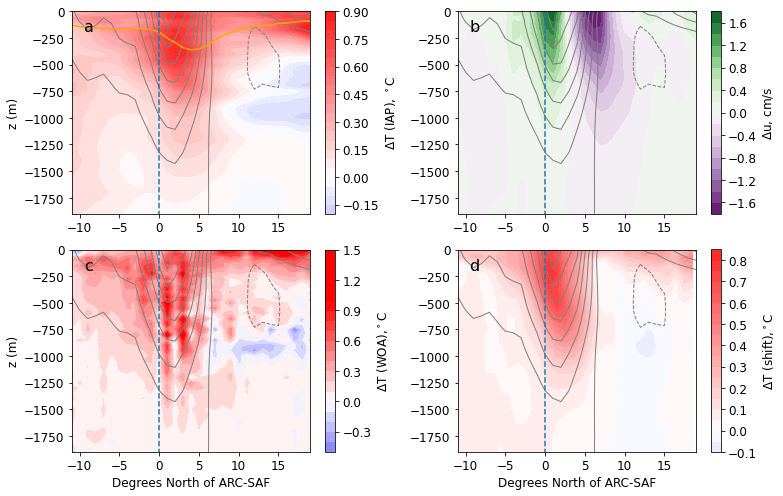

In [166]:
## I am going to do a streamline average actually, because it's straightforward. 

# WOA tf_str... is actually from another code ... it's pretty complicated!

# Test code for ocean velocity streamline average!!!

# might want to add isopycnals (from recent times? more accurate?)

avgT1960s = xr.open_dataarray(foldern + 'IAP_OceanT_1955to1973.nc') # not using these now. 
#avgT2000s = xr.open_dataarray(foldern + 'IAP_OceanT_2000to2018.nc')
IAP_T_1965_74= xr.open_dataarray('Apr24means/IAP_T_1965-74.nc')
IAP_T_2010_19= xr.open_dataarray('Apr24means/IAP_T_2010-19.nc')
IAP_geoU_1965_74 = np.load('Apr24means/IAP_geoU_1965_74.npy')
tmp = np.load('Apr24means/IAP_geoU_2010_19.npz')
IAP_geoU_2010_19 =  tmp['u_2010_19']
dep_u = tmp['dep_u']
lat_u = tmp['lat_u']


IAPlev = avgT1960s.depth_std

regdep = np.arange(0,44)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(11,7)) 


lats = -65 # write these between -90 and 90
latn = -10  

lonw = 20 #write these between 0 and 359! works globally
lone = 150

depth = 1900

vmS = 0.1
vmT = 1
vmU = 2
vmsig = 0.2

sos = 12
nos = 20

IAPlon = np.arange(lonw, lone)

# SAFy=np.interp(np.arange(lonw,lone)+0.5,orsiSAFx,orsiSAFy) 
ARCSAFy=np.interp(np.arange(lonw,lone)+0.5,SJFx,SJFy) # why is it + 0.5

#lat_u[10:70],-dep_u, IAP_geoU_2010_19[:,mylat,mylon]

#IAPtf = np.array(avgT2000s.transpose('depth_std','lat','lon'))
IAPtf2 = np.array(IAP_T_2010_19.transpose('depth_std','lat','lon'))
IAPti = np.array(avgT1960s.transpose('depth_std','lat','lon'))
IAPti2 = np.array(IAP_T_1965_74.transpose('depth_std','lat','lon'))
IAPsigi = np.array(IAP_sig1_1965_74.transpose('depth_std','lat','lon'))
#IAPsigf = np.array(IAP_sig1_2010_19.transpose('depth_std','lat','lon'))

IAPui = IAP_geoU_1965_74
IAPuf = IAP_geoU_2010_19
IAPud = IAPuf- IAPui


#IAPthei = IAPti2
IAPthed2 = IAPtf2-IAPti2
#IAPsigd = IAPsigf - IAPsigi

MLD_str= np.zeros([sos+nos, len(IAPlon)])
IAP_thetai_str = np.zeros([len(IAPlev), sos+nos, len(IAPlon)])
IAP_thetad_str = np.zeros([len(IAPlev), sos+nos, len(IAPlon)])
IAP_sigi_str = np.zeros([len(IAPlev), sos+nos, len(IAPlon)])
IAP_ud_str = np.zeros([len(IAPlev), sos+nos, len(IAPlon)])
IAP_uc_str = np.zeros([len(IAPlev), sos+nos, len(IAPlon)])
#WOA_tf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])


#plot1 = np.mean(pl_cont_u[:,:,mylon],2) 
#toPl = np.diff(toPl,1)

for i in np.arange(0,len(wocelon)-1):
    a = round(ARCSAFy[i]-0.5)+ 90
    a_u = round(ARCSAFy[i])+89
    #WOA_sal_str[:,:,i] = sald[wocedep, a-sos:a+nos, wocelon[i]]
    #WOA_theta_str[:,:,i] = thed[wocedep, a-sos:a+nos,wocelon[i]]
    MLD_str[:,i] = mldmax[a-sos:a+nos, IAPlon[i]+180]
    IAP_thetai_str[:,:,i] = IAPti2[:, a-sos:a+nos,IAPlon[i]]
    IAP_thetad_str[:,:,i] = IAPthed2[:, a-sos:a+nos,IAPlon[i]]
    IAP_sigi_str[:,:,i] = IAPsigi[:, a-sos:a+nos,IAPlon[i]]
    IAP_ud_str[:,:,i] = IAPud[:, a_u-sos:a_u+nos,IAPlon[i]]
    IAP_uc_str[:,:,i] = IAPuf[:, a_u-sos:a_u+nos,IAPlon[i]]
    #WOA_sig_str[:,:,i] = sigd[wocedep, a-sos:a+nos,wocelon[i]]
    #WOA_tf_str[:,:,i] = tf[wocedep, a-sos:a+nos, wocelon[i]]

plt.set_cmap('bwr')

A= axs[0,0].contourf(np.arange(-sos,nos), -IAPlev, np.nanmean(IAP_thetad_str,2), 20, vmin=-vmT, vmax=vmT)
plt.set_cmap('PRGn')
B = axs[0,1].contourf(np.arange(-sos,nos), -dep_u, np.nanmean(IAP_ud_str,2)*100, 20, vmin=-vmU, vmax=vmU)
#axs[0,0].contour(np.arange(-sos,nos), -dep_u, np.nanmean(IAP_sigi_str,2), 10 , colors = 'gray', linewidths = 1)
axs[0,0].contour(np.arange(-sos,nos), -dep_u, np.nanmean(IAP_uc_str,2), 11 , colors = 'gray', linewidths = 1)
axs[0,1].contour(np.arange(-sos,nos), -dep_u, np.nanmean(IAP_uc_str,2), 11 , colors = 'gray', linewidths = 1)

plt.set_cmap('bwr')
## can I just bring the WOA result in here? 
C= axs[1,0].contourf(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nanmean(WOA_tf_str,2), 20, vmin=-vmT, vmax=vmT)
axs[1,0].contour(np.arange(-sos,nos), -dep_u, np.nanmean(IAP_uc_str,2), 11 , colors = 'gray', linewidths = 1)

tdif = np.diff(np.nanmean(IAP_thetai_str,2),1, axis=1)
#wocediflat =  np.arange(lats+90,latn+89)
D = axs[1,1].contourf(np.arange(-sos+0.5,nos-0.5), -IAPlev, 0.5*tdif, 20, vmin=-1, vmax=1)
#Ccb.ax.tick_params(labelsize=labelsz)
#Dcb.ax.tick_params(labelsize=labelsz)
#axs[1,1].contour(np.arange(-sos,nos), -dep_u, np.nanmean(IAP_sigi_str,2), 10 , colors = 'gray', linewidths = 1)
axs[1,1].contour(np.arange(-sos,nos), -dep_u, np.nanmean(IAP_uc_str,2), 11 , colors = 'gray', linewidths = 1)


axs[0,0].set_ylabel("z (m)", fontsize = 'large')
axs[1,0].set_ylabel("z (m)", fontsize = 'large')
#axs[1,0].set_ylabel("z (m)", fontsize = 'large')
axs[1,1].set_xlabel("Degrees North of ARC-SAF", fontsize='large')
axs[1,0].set_xlabel("Degrees North of ARC-SAF", fontsize='large')
#axs[1,2].set_xlabel("Degrees North of SAF", fontsize='large')

Acb = fig.colorbar(A, ax=axs[0,0])
Bcb = fig.colorbar(B, ax=axs[0,1])
Ccb = fig.colorbar(C, ax=axs[1,0])
Dcb = fig.colorbar(D, ax=axs[1,1])

axs[0,0].plot(np.arange(-sos,nos), -np.nanmean(MLD_str,1),'orange')
#axs[0,0].plot(np.arange(-sos,nos), -np.nanmax(MLD_str,1),'orange',linestyle='dashed')
#
Acb.set_label("$\Delta$T (IAP), $^\circ$C",fontsize = 'large')
Bcb.set_label("$\Delta$u, cm/s",fontsize = 'large')
Ccb.set_label("$\Delta$T (WOA),$^\circ$C",fontsize = 'large')
Dcb.set_label("$\Delta$T (shift),$^\circ$C",fontsize = 'large')

#
labelsz = 12
Acb.ax.tick_params(labelsize=labelsz)
Bcb.ax.tick_params(labelsize=labelsz)
Ccb.ax.tick_params(labelsize=labelsz)
Dcb.ax.tick_params(labelsize=labelsz)

# contours are for reference
labels = ['a','b','c','d']
for j in (0,1):
    for k in (0,1):
        axs[j,k].tick_params(axis= 'x',labelsize = labelsz)
        axs[j,k].tick_params(axis= 'y',labelsize = labelsz)
        axs[j,k].set_xlim(-sos+1, nos-1)
        axs[j,k].set_ylim(-1900, 0)
        axs[j,k].text(0.05, 0.9, labels[2*j+k], size= 16,transform = axs[j,k].transAxes)
        axs[j,k].plot(0*IAPlev, -IAPlev, linestyle='dashed', linewidth = 1.5)
        #axs[j,k].plot(0*IAPlev+5, -IAPlev, linestyle='dashed', color='black', linewidth = 1)

fig.tight_layout()          
#plt.savefig('SISAZ_figures/Obs_ARCSAF_7-29.eps')


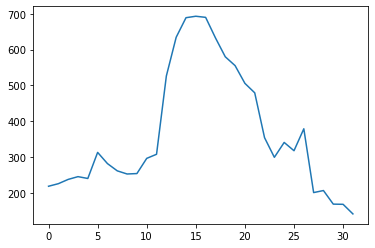

In [156]:
plt.plot(np.nanmax(MLD_str[:,:],1))

In [143]:
IAPlon

array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149])

NameError: name 'W' is not defined

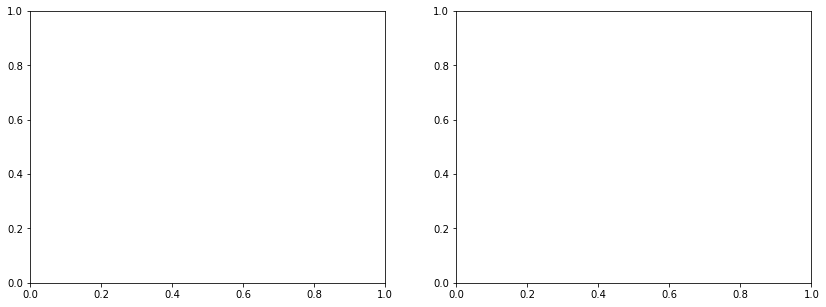

In [24]:



avgT1960s = xr.open_dataarray(foldern + 'IAP_OceanT_1955to1973.nc')
avgT2000s = xr.open_dataarray(foldern + 'IAP_OceanT_2000to2018.nc')

IAPlev = avgT1960s.depth_std

regdep = np.arange(0,58)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,5)) 


lats = 0 # write these between -90 and 90
latn = 80  

lonw = 280 #write these between 0 and 359! works globally
lone = 359

depth = 2000

vmS = 0.1
vmT = 1
vmsig = 0.2

sos = 12
nos = 20

IAPlon = np.arange(lonw, lone)
wocelat = np.arange(lats+90,latn+90)
wocew = (lonw+180)%360
wocee = (lone+180)%360
if wocee<wocew:
    wocew = wocew-360
wocelon = np.arange(wocew,wocee) # no this messes up if section includes 180. There's a better way.
wocedep = np.arange(0, np.argmin(np.abs(np.array(WOA_TA.depth- depth))))

#SAFy=np.interp(np.arange(lonw,lone)+0.5,orsiSAFx,orsiSAFy)

ARCSAFy=np.interp(np.arange(lonw,lone)+0.5,SJFx,SJFy) 

sf = WOA_SA.s_an.isel(time=0)
si = WOA_S5.s_an.isel(time=0) #+ np.array(WOA_S5.s_an.isel(time=0))
sald = sf-si

tf = np.array(WOA_TA.t_an.isel(time=0))
ti = np.array(WOA_T6.t_an.isel(time=0)) #+ np.array(WOA_T5.t_an.isel(time=0))
thed = tf-ti

di = np.array(WOA_T6.t_dd.isel(time=0))
gp = np.array(WOA_T5.t_gp.isel(time=0))
oa = np.array(WOA_TA.t_oa.isel(time=0))
mn = np.array(WOA_TA.t_mn.isel(time=0))
mn6 = np.array(WOA_T6.t_mn.isel(time=0))
mn5 = np.array(WOA_T5.t_mn.isel(time=0))
oa6 = np.array(WOA_T6.t_oa.isel(time=0))

IAPtf = np.array(avgT2000s.transpose('depth_std','lat','lon'))
IAPti = np.array(avgT1960s.transpose('depth_std','lat','lon'))
IAPthed = IAPtf-IAPti

sigi = gsw.sigma0(si/2, ti/2) #WOA_S6.s_an[0,wocedep,wocelat,wocelon], WOA_T6.t_an[0,wocedep,wocelat,wocelon])
sigf = gsw.sigma0(sf, tf)
sigd = sigf-sigi

# not doing anything with streamlines for now. 

#WOA_theta_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_tdd_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_nodat_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#IAP_theta_str = np.zeros([len(IAPlev), sos+nos, len(IAPlon)])
#WOA_tf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_t5_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_sf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_sig_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_sigf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_oa6_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#

# if there is a value for mn6, then we want mn - mn6. 
# if there's no value for mn6, then mn6 is nan and we want nan.
# is just differencing mn6 and nan enough? 

#ctr = 0
#for i in np.arange(0,len(wocelon)-1):
#    a = int(ARCSAFy[i])+ 90
#    #if np.nansum(di[wocedep, a-2:a+2, wocelon[i]])>100:
#    WOA_sigf_str[:,:,i] = sigf[wocedep, a-sos:a+nos,wocelon[i]]
#    #if np.nansum(mn6[wocedep, a-2:a+2, wocelon[i]])>1:
#    if True:
#        WOA_theta_str[:,:,i] = oa[wocedep, a-sos:a+nos,wocelon[i]] # thed
#        WOA_tdd_str[:,:,i] = di[wocedep, a-sos:a+nos,wocelon[i]]
#        #WOA_mn6_str[:,:,i] = oa6[wocedep, a-sos:a+nos,wocelon[i]] # thed
#        WOA_t5_str[:,:,i] = mn[wocedep, a-sos:a+nos,wocelon[i]] - mn5[wocedep, a-sos:a+nos,wocelon[i]]
#        WOA_tf_str[:,:,i] = mn[wocedep, a-sos:a+nos,wocelon[i]] - mn6[wocedep, a-sos:a+nos,wocelon[i]] 
#        
#        ctr+=1
#    else: 
#        WOA_nodat_str[:,:,i] = oa[wocedep, a-sos:a+nos,wocelon[i]]
#    # WOA_sal_str[:,:,i] = sald[wocedep, a-sos:a+nos, wocelon[i]]
#    #WOA_tdd_str[:,:,i] = di[wocedep, a-sos:a+nos, wocelon[i]]

plt.set_cmap('bwr')
#tf = np.array(WOA_TA.t_an[wocedep,wocelat,wocelon])
#ti = np.array(WOA_T6.t_an[0,wocedep,wocelat,wocelon].mean(dim='lon')) + np.array(WOA_T5.t_an[0,wocedep,wocelat,wocelon].mean(dim='lon'))
#ti =ti/2
A = axs[0].contourf(W, -WOA_TA.depth[wocedep], np.nanmean(thed[:,:,wocedep],2), 20, vmin=-vmT, vmax=vmT)
#B = axs[1].contourf(np.arange(-sos,nos), -IAPlev, np.nanmean(IAP_theta_str,2), 20, vmin=-vmT, vmax=vmT)
#plt.set_cmap('viridis')
#B = axs[1].contourf(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nanmean(WOA_nodat_str,2) * 140/(140-ctr), 20,vmin=-vmT, vmax=vmT)
B = axs[1].contourf(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nansum(di,2), 20,vmin=0, vmax = 200, levels = 1000, cmap= 'viridis')
axs[0].contour(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nanmean(WOA_sigf_str,2), 20 , colors = 'gray', linewidths = 1)

axs[0].set_title("WOA Raw Temperature Change") # that took a while to find, equivalent to caxis in MATLAB I think 
#axs[1,0].set_title("0.5 degree shift ($^o$C)")#cb = fig.colorbar(fig,shrink = 0.5)

axs[1].set_title("Means, 05-18 minus 55-64")
#axs[1].set_title("log10(mean data frequency)")

#fig.suptitle('Indian basin (30-170) average')


axs[0].set_ylabel("z (m)", fontsize = 'large')
#axs[1,0].set_ylabel("z (m)", fontsize = 'large')
axs[1].set_xlabel("Degrees North of ARC-SAF", fontsize = 'large')
axs[0].set_xlabel("Degrees North of ARC-SAF", fontsize='large')
#axs[1,2].set_xlabel("Degrees North of SAF", fontsize='large')

Acb = fig.colorbar(A, ax=axs[0])
Bcb = fig.colorbar(B, ax=axs[1])

#Ccb = fig.colorbar(C, ax=axs[0,2])

#
labelsz = 12
Acb.ax.tick_params(labelsize=labelsz)
Bcb.ax.tick_params(labelsize=labelsz)
#Ccb.ax.tick_params(labelsize=labelsz)
Acb.set_label("$^\circ$C",fontsize = 'large')

# contours are for reference
print('ctr = ' + str(ctr))

for j in (0,1):
    axs[j].tick_params(axis= 'x',labelsize = labelsz)
    axs[j].tick_params(axis= 'y',labelsize = labelsz)
    #axs[j].grid()
    axs[j].set_xlim(-sos+1,nos-1)
    axs[j].plot(0*IAPlev-2, -IAPlev, linestyle='dashed', color='black', linewidth = 1)
    axs[j].plot(0*IAPlev+5, -IAPlev, linestyle='dashed', color='black', linewidth = 1)

    
# yeah I really want to overlay a scatter. Basically it would say, for each of the things, if it's greater, plot. 
msms = np.nansum(WOA_tdd_str,2)
for k in np.arange(sos+nos):
    for m in wocedep:
        if msms[m,k]>30:
            axs[0].scatter(k-sos, -WOA_TA.depth[m], c='black')

#plt.savefig('SISAZ_figures/streamline_WOAvsIAP_11-10_TS_Indian.eps')


In [ ]:


fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(15,9))
axs[0] = plt.axes(projection=ccrs.PlateCarree())
axs[0].coastlines()

reglat = np.arange(90,170)
reglon =np.arange(90,180)
#clims = [-5e9, 5e9]
plt.set_cmap('viridis')

toPl2 = WOA_TA.t_dd.isel(time=0).sum('depth')
toPl2 = np.log(toPl2)


toPl3 = WOA_S6.s_dd.isel(time=0).sum('depth')
toPl3 = np.log(toPl3)

lon = WOA_T6.lon
lat = WOA_T6.lat

Q = axs[0].contourf(lon[reglon], lat[reglat], toPl3[reglat,reglon] , 
          transform=ccrs.PlateCarree(), vmin =0, vmax = 10,levels =35 )
#Q = axs[1].contourf(lon[reglon], lat[reglat], toPl2[reglat,reglon] , 
         # transform=ccrs.PlateCarree(), vmin =0, vmax = 10,levels =35 )

gl = axs[0].gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
plt.colorbar(Q)
#plt.set_cmap("bwr")
#ax.set_title("Observed Increase in Ocean Heat Content above 2000m depth", fontsize = 'x-large')


#mlat = reglat - 90 # actual latitude
#plt.contour(mke_mean.longitude.sel(longitude = reglon, method = 'nearest'),mke_mean.latitude.sel(latitude = mlat, method = 'nearest'),  mke_mean.sel(longitude = reglon, latitude=mlat, method = 'nearest'), levels=[ 10, 50], linewidths = 0.5, colors='green')


In [ ]:


fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(15,9))
axs[0] = plt.axes(projection=ccrs.PlateCarree())
axs[0].coastlines()

reglat = np.arange(90,170)
reglon =np.arange(90,180)
mydep = np.arange(36,57)

#clims = [-5e9, 5e9]
plt.set_cmap('bwr')

toPl2 = WOA_TA.t_dd.isel(time=0).isel(depth=mydep).sum('depth') 
toPl2 = np.log(toPl2)


toPl3 = WOA_T6.t_dd.isel(time=0).isel(depth=mydep).sum('depth')
toPl3 = np.log(toPl3)

lon = WOA_T6.lon
lat = WOA_T6.lat

Q = axs[0].contourf(lon[reglon], lat[reglat], toPl2[reglat,reglon] - toPl3[reglat,reglon] , 
          transform=ccrs.PlateCarree(), vmin =-10, vmax = 10,levels =35 )
#Q = axs[1].contourf(lon[reglon], lat[reglat], toPl2[reglat,reglon] , 
         # transform=ccrs.PlateCarree(), vmin =0, vmax = 10,levels =35 )

gl = axs[0].gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
plt.colorbar(Q)
#plt.set_cmap("bwr")
#ax.set_title("Observed Increase in Ocean Heat Content above 2000m depth", fontsize = 'x-large')


#mlat = reglat - 90 # actual latitude
#plt.contour(mke_mean.longitude.sel(longitude = reglon, method = 'nearest'),mke_mean.latitude.sel(latitude = mlat, method = 'nearest'),  mke_mean.sel(longitude = reglon, latitude=mlat, method = 'nearest'), levels=[ 10, 50], linewidths = 0.5, colors='green')


In [ ]:


fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(15,9))
axs[0] = plt.axes(projection=ccrs.PlateCarree())
axs[0].coastlines()

reglat = np.arange(90,170)
reglon =np.arange(270,360)
mydep = np.arange(0,10)
#clims = [-5e9, 5e9]
plt.set_cmap('bwr')

toPl2 = WOA_TA.t_dd.isel(time=0).isel(depth=mydep).sum('depth') 
toPl2 = np.log(toPl2)


toPl3 = WOA_T6.t_dd.isel(time=0).isel(depth=mydep).sum('depth')
toPl3 = np.log(toPl3)

lon = WOA_T6.lon
lat = WOA_T6.lat

Q = axs[0].contourf(lon[reglon], lat[reglat], toPl2[reglat,reglon] - toPl3[reglat,reglon] , 
          transform=ccrs.PlateCarree(), vmin =-10, vmax = 10,levels =35 )
#Q = axs[1].contourf(lon[reglon], lat[reglat], toPl2[reglat,reglon] , 
         # transform=ccrs.PlateCarree(), vmin =0, vmax = 10,levels =35 )

gl = axs[0].gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
plt.colorbar(Q)
#plt.set_cmap("bwr")
#ax.set_title("Observed Increase in Ocean Heat Content above 2000m depth", fontsize = 'x-large')


#mlat = reglat - 90 # actual latitude
#plt.contour(mke_mean.longitude.sel(longitude = reglon, method = 'nearest'),mke_mean.latitude.sel(latitude = mlat, method = 'nearest'),  mke_mean.sel(longitude = reglon, latitude=mlat, method = 'nearest'), levels=[ 10, 50], linewidths = 0.5, colors='green')


In [ ]:
WOA_T6.depth[36:57]

In [ ]:

fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(15,9))
axs[0] = plt.axes(projection=ccrs.PlateCarree())
axs[0].coastlines()

reglat = np.arange(90,170)
reglon =np.arange(90,180) # 270,360 for kuroshio
mydep = np.arange(36,57)
#clims = [-5e9, 5e9]
plt.set_cmap('bwr')

toPl2 = WOA_TA.t_oa.isel(time=0).isel(depth=mydep).mean('depth') 
#toPl2 = np.log(toPl2)


toPl3 = WOA_T6.t_oa.isel(time=0).isel(depth=mydep).mean('depth') 
#toPl3 = np.log(toPl3)

lon = WOA_T6.lon
lat = WOA_T6.lat

Q = axs[0].contourf(lon[reglon], lat[reglat], toPl2[reglat,reglon], #- toPl2[reglat,reglon], 
          transform=ccrs.PlateCarree(), vmin =-2, vmax = 2,levels =35 )
#Q = axs[1].contourf(lon[reglon], lat[reglat], toPl2[reglat,reglon] , 
         # transform=ccrs.PlateCarree(), vmin =0, vmax = 10,levels =35 )

gl = axs[0].gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True)
plt.colorbar(Q)
#plt.set_cmap("bwr")
#ax.set_title("Observed Increase in Ocean Heat Content above 2000m depth", fontsize = 'x-large')

# find a nice contour


cont = [35,36,37,37,38,38,38,38,38,38,38,39,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40, 40,]
axs[0].plot(np.arange(106,134)-180,cont)


#mlat = reglat - 90 # actual latitude
#plt.contour(mke_mean.longitude.sel(longitude = reglon, method = 'nearest'),mke_mean.latitude.sel(latitude = mlat, method = 'nearest'),  mke_mean.sel(longitude = reglon, latitude=mlat, method = 'nearest'), levels=[ 10, 50], linewidths = 0.5, colors='green')


In [ ]:
## another try to briefly investigate the Northern Hemisphere regions! 
# right here, I just want to look at the change in data density, which is .dd


avgT1960s = xr.open_dataarray(foldern + 'IAP_OceanT_1955to1973.nc')
avgT2000s = xr.open_dataarray(foldern + 'IAP_OceanT_2000to2018.nc')

IAPlev = avgT1960s.depth_std

regdep = np.arange(0,58)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,5)) 


lats = 0 # write these between -90 and 90
latn = 80  

lonw = 286 #write these between 0 and 359! works globally
lone = 314

depth = 2000

vmS = 0.1
vmT = 1
vmsig = 0.2

sos = 10
nos = 3

IAPlon = np.arange(lonw, lone)
wocelat = np.arange(lats+90,latn+90)
wocew = (lonw+180)%360
wocee = (lone+180)%360
if wocee<wocew:
    wocew = wocew-360
wocelon = np.arange(wocew,wocee) # no this messes up if section includes 180. There's a better way.
wocedep = np.arange(0, np.argmin(np.abs(np.array(WOA_TA.depth- depth))))

#SAFy=np.interp(np.arange(lonw,lone)+0.5,orsiSAFx,orsiSAFy)

#ARCSAFy=np.interp(np.arange(lonw,lone)+0.5,SJFx,SJFy) 

cont = [35,36,37,37,38,38,38,38,38,38,38,39,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40, 40]

sf = WOA_SA.s_an.isel(time=0)
si = WOA_S5.s_an.isel(time=0) #+ np.array(WOA_S5.s_an.isel(time=0))
sald = sf-si

tf = np.array(WOA_TA.t_an.isel(time=0))
ti = np.array(WOA_T6.t_an.isel(time=0)) #+ np.array(WOA_T5.t_an.isel(time=0))
thed = tf-ti

di = np.array(WOA_TA.t_dd.isel(time=0))
gp = np.array(WOA_T5.t_gp.isel(time=0))
oa = np.array(WOA_TA.t_oa.isel(time=0))
mn = np.array(WOA_TA.t_mn.isel(time=0))
dd6 = np.array(WOA_T6.t_dd.isel(time=0))
mn6 = np.array(WOA_T6.t_mn.isel(time=0))
mn5 = np.array(WOA_T5.t_mn.isel(time=0))
oa6 = np.array(WOA_T6.t_oa.isel(time=0))

IAPtf = np.array(avgT2000s.transpose('depth_std','lat','lon'))
IAPti = np.array(avgT1960s.transpose('depth_std','lat','lon'))
IAPthed = IAPtf-IAPti

sigi = gsw.sigma0(si/2, ti/2) #WOA_S6.s_an[0,wocedep,wocelat,wocelon], WOA_T6.t_an[0,wocedep,wocelat,wocelon])
sigf = gsw.sigma0(sf, tf)
sigd = sigf-sigi

# not doing anything with streamlines for now. 

WOA_theta_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_tdd_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_nodat_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#IAP_theta_str = np.zeros([len(IAPlev), sos+nos, len(IAPlon)])
#WOA_tf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_t5_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_sf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_sig_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_sigf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_oa6_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])


# if there is a value for mn6, then we want mn - mn6. 
# if there's no value for mn6, then mn6 is nan and we want nan.
# is just differencing mn6 and nan enough? 

ctr = 0
for i in np.arange(0,len(wocelon)-1):
    a = int(cont[i]) + 90
    #if np.nansum(di[wocedep, a-2:a+2, wocelon[i]])>100:
    WOA_sigf_str[:,:,i] = sigf[wocedep, a-sos:a+nos,wocelon[i]]
    #if np.nansum(mn6[wocedep, a-2:a+2, wocelon[i]])>1:
    if True:
        WOA_theta_str[:,:,i] = oa[wocedep, a-sos:a+nos,wocelon[i]]  # thed
        WOA_tdd_str[:,:,i] = di[wocedep, a-sos:a+nos,wocelon[i]] 
        #WOA_mn6_str[:,:,i] = oa6[wocedep, a-sos:a+nos,wocelon[i]] # thed
        #WOA_t5_str[:,:,i] = mn[wocedep, a-sos:a+nos,wocelon[i]] - mn5[wocedep, a-sos:a+nos,wocelon[i]]
        #WOA_tf_str[:,:,i] = mn[wocedep, a-sos:a+nos,wocelon[i]] - mn6[wocedep, a-sos:a+nos,wocelon[i]] 
        
        ctr+=1
    else: 
        
        WOA_nodat_str[:,:,i] = oa[wocedep, a-sos:a+nos,wocelon[i]]
    # WOA_sal_str[:,:,i] = sald[wocedep, a-sos:a+nos, wocelon[i]]
    #WOA_tdd_str[:,:,i] = di[wocedep, a-sos:a+nos, wocelon[i]]

plt.set_cmap('bwr')
#tf = np.array(WOA_TA.t_an[wocedep,wocelat,wocelon])
#ti = np.array(WOA_T6.t_an[0,wocedep,wocelat,wocelon].mean(dim='lon')) + np.array(WOA_T5.t_an[0,wocedep,wocelat,wocelon].mean(dim='lon'))
#ti =ti/2
A = axs[0].contourf(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nanmean(WOA_theta_str,2), 20, vmin=-vmT, vmax=vmT)
#B = axs[1].contourf(np.arange(-sos,nos), -IAPlev, np.nanmean(IAP_theta_str,2), 20, vmin=-vmT, vmax=vmT)
#plt.set_cmap('viridis')
#B = axs[1].contourf(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nanmean(WOA_nodat_str,2) * 140/(140-ctr), 20,vmin=-vmT, vmax=vmT)
B = axs[1].contourf(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nansum(WOA_tdd_str,2), 20,vmin=0, vmax = 2000, levels = 1000, cmap= 'viridis')
axs[0].contour(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nanmean(WOA_sigf_str,2), 10 , colors = 'gray', linewidths = 1)

axs[0].set_title("Observed minus Mapped Temp, Argo era") # that took a while to find, equivalent to caxis in MATLAB I think 
#axs[1,0].set_title("0.5 degree shift ($^o$C)")#cb = fig.colorbar(fig,shrink = 0.5)

axs[1].set_title("Total Observations from Argo era")
#axs[1].set_title("log10(mean data frequency)")

#fig.suptitle('Indian basin (30-170) average')


axs[0].set_ylabel("z (m)", fontsize = 'large')
#axs[1,0].set_ylabel("z (m)", fontsize = 'large')
axs[1].set_xlabel("Degrees North of Gulf Stream", fontsize = 'large')
axs[0].set_xlabel("Degrees North of Gulf Stream", fontsize='large')
#axs[1,2].set_xlabel("Degrees North of SAF", fontsize='large')

Acb = fig.colorbar(A, ax=axs[0])
Bcb = fig.colorbar(B, ax=axs[1])

#Ccb = fig.colorbar(C, ax=axs[0,2])

#
labelsz = 12
Acb.ax.tick_params(labelsize=labelsz)
Bcb.ax.tick_params(labelsize=labelsz)
#Ccb.ax.tick_params(labelsize=labelsz)
Acb.set_label("$^\circ$C",fontsize = 'large')

# contours are for reference
print('ctr = ' + str(ctr))

for j in (0,1):
    axs[j].tick_params(axis= 'x',labelsize = labelsz)
    axs[j].tick_params(axis= 'y',labelsize = labelsz)
    #axs[j].grid()
    axs[j].set_xlim(-sos+1,nos-1)
    #axs[j].plot(0*IAPlev-2, -IAPlev, linestyle='dashed', color='black', linewidth = 1)
    #axs[j].plot(0*IAPlev+5, -IAPlev, linestyle='dashed', color='black', linewidth = 1)

    
# yeah I really want to overlay a scatter. Basically it would say, for each of the things, if it's greater, plot. 
#msms = np.nansum(WOA_tdd_str,2)
#for k in np.arange(sos+nos):
#    for m in wocedep:
#        if msms[m,k]>30:
#            axs[0].scatter(k-sos, -WOA_TA.depth[m], c='black')
#
#plt.savefig('SISAZ_figures/streamline_WOAvsIAP_11-10_TS_Indian.eps')


In [ ]:
## another try to briefly investigate the Northern Hemisphere regions! 
# right here, I just want to look at the change in data density, which is .dd


avgT1960s = xr.open_dataarray(foldern + 'IAP_OceanT_1955to1973.nc')
avgT2000s = xr.open_dataarray(foldern + 'IAP_OceanT_2000to2018.nc')

IAPlev = avgT1960s.depth_std

regdep = np.arange(0,58)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,5)) 


lats = 0 # write these between -90 and 90
latn = 80  

lonw = 286 #write these between 0 and 359! works globally
lone = 314

depth = 2000

vmS = 0.1
vmT = 1
vmsig = 0.2

sos = 10
nos = 3

IAPlon = np.arange(lonw, lone)
wocelat = np.arange(lats+90,latn+90)
wocew = (lonw+180)%360
wocee = (lone+180)%360
if wocee<wocew:
    wocew = wocew-360
wocelon = np.arange(wocew,wocee) # no this messes up if section includes 180. There's a better way.
wocedep = np.arange(0, np.argmin(np.abs(np.array(WOA_TA.depth- depth))))

#SAFy=np.interp(np.arange(lonw,lone)+0.5,orsiSAFx,orsiSAFy)

#ARCSAFy=np.interp(np.arange(lonw,lone)+0.5,SJFx,SJFy) 

cont = [35,36,37,37,38,38,38,38,38,38,38,39,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40, 40]

sf = WOA_SA.s_an.isel(time=0)
si = WOA_S5.s_an.isel(time=0) #+ np.array(WOA_S5.s_an.isel(time=0))
sald = sf-si

tf = np.array(WOA_TA.t_an.isel(time=0))
ti = np.array(WOA_T6.t_an.isel(time=0)) #+ np.array(WOA_T5.t_an.isel(time=0))
thed = tf-ti

di = np.array(WOA_TA.t_dd.isel(time=0))
gp = np.array(WOA_T5.t_gp.isel(time=0))
oa = np.array(WOA_TA.t_oa.isel(time=0))
mn = np.array(WOA_TA.t_mn.isel(time=0))
dd6 = np.array(WOA_T6.t_dd.isel(time=0))
mn6 = np.array(WOA_T6.t_mn.isel(time=0))
mn5 = np.array(WOA_T5.t_mn.isel(time=0))
oa6 = np.array(WOA_T6.t_oa.isel(time=0))

IAPtf = np.array(avgT2000s.transpose('depth_std','lat','lon'))
IAPti = np.array(avgT1960s.transpose('depth_std','lat','lon'))
IAPthed = IAPtf-IAPti

sigi = gsw.sigma0(si/2, ti/2) #WOA_S6.s_an[0,wocedep,wocelat,wocelon], WOA_T6.t_an[0,wocedep,wocelat,wocelon])
sigf = gsw.sigma0(sf, tf)
sigd = sigf-sigi

# not doing anything with streamlines for now. 

WOA_theta_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_tdd_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_nodat_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#IAP_theta_str = np.zeros([len(IAPlev), sos+nos, len(IAPlon)])
#WOA_tf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_t5_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_sf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_sig_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
WOA_sigf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_oa6_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])


# if there is a value for mn6, then we want mn - mn6. 
# if there's no value for mn6, then mn6 is nan and we want nan.
# is just differencing mn6 and nan enough? 

ctr = 0
for i in np.arange(0,len(wocelon)-1):
    a = int(cont[i]) + 90
    #if np.nansum(di[wocedep, a-2:a+2, wocelon[i]])>100:
    WOA_sigf_str[:,:,i] = sigf[wocedep, a-sos:a+nos,wocelon[i]]
    #if np.nansum(mn6[wocedep, a-2:a+2, wocelon[i]])>1:
    if True:
        WOA_theta_str[:,:,i] = oa[wocedep, a-sos:a+nos,wocelon[i]] - oa6[wocedep, a-sos:a+nos,wocelon[i]] # thed
        WOA_tdd_str[:,:,i] = di[wocedep, a-sos:a+nos,wocelon[i]] - dd6[wocedep, a-sos:a+nos,wocelon[i]] 
        #WOA_mn6_str[:,:,i] = oa6[wocedep, a-sos:a+nos,wocelon[i]] # thed
        #WOA_t5_str[:,:,i] = mn[wocedep, a-sos:a+nos,wocelon[i]] - mn5[wocedep, a-sos:a+nos,wocelon[i]]
        #WOA_tf_str[:,:,i] = mn[wocedep, a-sos:a+nos,wocelon[i]] - mn6[wocedep, a-sos:a+nos,wocelon[i]] 
        
        ctr+=1
    else: 
        
        WOA_nodat_str[:,:,i] = oa[wocedep, a-sos:a+nos,wocelon[i]]
    # WOA_sal_str[:,:,i] = sald[wocedep, a-sos:a+nos, wocelon[i]]
    #WOA_tdd_str[:,:,i] = di[wocedep, a-sos:a+nos, wocelon[i]]

plt.set_cmap('bwr')
#tf = np.array(WOA_TA.t_an[wocedep,wocelat,wocelon])
#ti = np.array(WOA_T6.t_an[0,wocedep,wocelat,wocelon].mean(dim='lon')) + np.array(WOA_T5.t_an[0,wocedep,wocelat,wocelon].mean(dim='lon'))
#ti =ti/2
A = axs[0].contourf(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nanmean(WOA_theta_str,2), 20, vmin=-vmT, vmax=vmT)
#B = axs[1].contourf(np.arange(-sos,nos), -IAPlev, np.nanmean(IAP_theta_str,2), 20, vmin=-vmT, vmax=vmT)
#plt.set_cmap('viridis')
#B = axs[1].contourf(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nanmean(WOA_nodat_str,2) * 140/(140-ctr), 20,vmin=-vmT, vmax=vmT)
B = axs[1].contourf(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nansum(WOA_tdd_str,2), 20,vmin=-1000, vmax = 1000, levels = 1000, cmap= 'bwr')
axs[0].contour(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nanmean(WOA_sigf_str,2), 10 , colors = 'gray', linewidths = 1)

axs[0].set_title("Observed minus Mapped Temp, Argo era") # that took a while to find, equivalent to caxis in MATLAB I think 
#axs[1,0].set_title("0.5 degree shift ($^o$C)")#cb = fig.colorbar(fig,shrink = 0.5)

axs[1].set_title("Total Observations from Argo era")
#axs[1].set_title("log10(mean data frequency)")

#fig.suptitle('Indian basin (30-170) average')


axs[0].set_ylabel("z (m)", fontsize = 'large')
#axs[1,0].set_ylabel("z (m)", fontsize = 'large')
axs[1].set_xlabel("Degrees North of Gulf Stream", fontsize = 'large')
axs[0].set_xlabel("Degrees North of Gulf Stream", fontsize='large')
#axs[1,2].set_xlabel("Degrees North of SAF", fontsize='large')

Acb = fig.colorbar(A, ax=axs[0])
Bcb = fig.colorbar(B, ax=axs[1])

#Ccb = fig.colorbar(C, ax=axs[0,2])

#
labelsz = 12
Acb.ax.tick_params(labelsize=labelsz)
Bcb.ax.tick_params(labelsize=labelsz)
#Ccb.ax.tick_params(labelsize=labelsz)
Acb.set_label("$^\circ$C",fontsize = 'large')

# contours are for reference
print('ctr = ' + str(ctr))

for j in (0,1):
    axs[j].tick_params(axis= 'x',labelsize = labelsz)
    axs[j].tick_params(axis= 'y',labelsize = labelsz)
    #axs[j].grid()
    axs[j].set_xlim(-sos+1,nos-1)
    #axs[j].plot(0*IAPlev-2, -IAPlev, linestyle='dashed', color='black', linewidth = 1)
    #axs[j].plot(0*IAPlev+5, -IAPlev, linestyle='dashed', color='black', linewidth = 1)

    
# yeah I really want to overlay a scatter. Basically it would say, for each of the things, if it's greater, plot. 
#msms = np.nansum(WOA_tdd_str,2)
#for k in np.arange(sos+nos):
#    for m in wocedep:
#        if msms[m,k]>30:
#            axs[0].scatter(k-sos, -WOA_TA.depth[m], c='black')
#
#plt.savefig('SISAZ_figures/streamline_WOAvsIAP_11-10_TS_Indian.eps')


In [ ]:
plt.contourf(sumSig[:,:,1]/10)
plt.colorbar()

In [ ]:
# so once I have the different densities between the two regions ... 
# I can essentially do a thermal wind calculation, using the two densities. 
# First, basically, I should look and find u velocity. This is basically integrating from the bottom up ... 
# other alternative is that I just use the geostrophic value that is on the server ... bit of a waste, but might save time. 


## gnarly code to get passive velocity.
# so basically we need a second set of coord's for velocity. This would include probably be straightforward to calculate. 
# I think the coordinates we have are centered in the cells. 
dep_u = (np.array(IAP_sig1_1965_74.depth_std[0:-1]) + np.array(IAP_sig1_1965_74.depth_std[1:]))/2 
dep_u = np.append([0],dep_u)
lat_u = np.arange(-89, 90)


#tmp = np.array(pl_heat_pass[:,mylat,mylon])
sigdiff = IAP_sig1_2010_19.diff('lat')
sigdiff = np.array(sigdiff.transpose('depth_std','lat','lon'))
#alpha = gsw.alpha(pl_heat_sal[:,mylat,mylon], pl_cont_theta[:,mylat,mylon], depfile)
deltau = 0*sigdiff
dz  = np.append(np.diff(dep_u),[100])
f = np.expand_dims(np.array(1.4e-4*np.sin(lat_u*np.pi/180)),1)


for zc in np.arange(40,-1,-1): 
    #print("asdf")
    deltau[zc,:,:] =  dz[zc]* sigdiff[zc,:,:] * 9.81/(f * 111000)/1000 
    # can use this for loop as long as I can just test each one to see if it's a nan. 
    #pl_heat_delu[zc,:,:] = pl_heat_delu[zc+1,:,:] + dz[zc] * alpha[zc,:,:] * tdif[zc,:,:] * 9.81 /( f[mylat,mylon] * 111000)
    # I think I should just cumsum my test_accel, and that would give the same ... 
    #Dz can probably be just np.diff(depfile). Dy = 111000*np.diff(latfile[mylat, mylon]). F = 1.4e-4* sin (latfile). 
nice3 = deltau[::-1,:,:] # does this read it backwards? I think so ... 
nice3cum = np.nancumsum(nice3,axis=0) # this is a little better! 
#IAP_geoU_1965_74 = ma.masked_equal(nice3cum[::-1,:,:], 0)
IAP_geoU_2010_19 = ma.masked_equal(nice3cum[::-1,:,:], 0)



In [ ]:
#mylat = np.arange(10,70)
#mylon = 120
#
#plt.contourf(lat_u[10:70],-dep_u, IAP_geoU_2010_19[:,mylat,mylon] - IAP_geoU_1965_74[:,mylat,mylon], levels = 10, vmin = -0.2, vmax= 0.2)
#plt.set_cmap('bwr')
#plt.colorbar()

In [ ]:
import numpy.ma as ma
t1 = ma.masked_array(pl_heat_delu, mask = ma.masked_equal(pl_heat_delu,0))
#ma.masked_invalid(nice3)
#pl_heat_delu.shape


In [ ]:
asdf = np.append([0],dep_u)
asdf

In [ ]:
IAP

In [ ]:
deltau[:,50,0]

In [ ]:
## OK here's where I want to process the ocean velocity data. 
# this is a little tricky... 
# one question is whether there are nonlinearities with density - there probably are. 
# if we do density structure though, thermal wind should be totally linear?? 

# Ok let's do some coding projects. 
# First I want to simply average a range of years.
#sumT = np.zeros([180,360,41])
#
#months = ["01","02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
#for i in np.arange(1965,1975):
#    for j in np.arange(0,12):
#        tmp = xr.open_dataset("/nfs/data/IAP_gridded/Temperature/CZ16_1_2000m_Temp_year_" + str(i)+"_month_" + str(months[j])+".nc")
#        sumT = sumT+ tmp.temp
#        
#IAP_T_1965_74 = sumT/(10*12)
## IAP_T_1965_74.to_netcdf('Apr24_means/IAP_T_1965-74.nc')

# Ok this is easy. How do we then compare this new value to the existing one? Well, just switch them out. 

# yay ocean velocity is mostly working! 


In [ ]:
#arr = ma.filled(IAP_geoU_1965_74, np.nan)
#np.savez('Apr24means/IAP_geoU_1965_74.npz', u_1965_74 = arr, dep_u = dep_u, lat_u = lat_u)

# probably need to save the depth and latitude coordinates as well, that would be good. 

In [ ]:
#arr = ma.filled(IAP_geoU_2010_19, np.nan)
#np.savez('Apr24means/IAP_geoU_2010_19.npz', u_2010_19 = arr, dep_u = dep_u, lat_u = lat_u)

In [ ]:
# Test code for ocean velocity streamline average!!!

# might want to add isopycnals (from recent times? more accurate?)

avgT1960s = xr.open_dataarray(foldern + 'IAP_OceanT_1955to1973.nc')
avgT2000s = xr.open_dataarray(foldern + 'IAP_OceanT_2000to2018.nc')

IAPlev = avgT1960s.depth_std

regdep = np.arange(0,44)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,5)) 


lats = -65 # write these between -90 and 90
latn = -10  

lonw = 20 #write these between 0 and 359! works globally
lone = 150

depth = 2000

vmS = 0.1
vmT = 1
vmU = 3
vmsig = 0.2

sos = 12
nos = 20

IAPlon = np.arange(lonw, lone)

# SAFy=np.interp(np.arange(lonw,lone)+0.5,orsiSAFx,orsiSAFy) 
ARCSAFy=np.interp(np.arange(lonw,lone)+0.5,SJFx,SJFy) # why is it + 0.5

#lat_u[10:70],-dep_u, IAP_geoU_2010_19[:,mylat,mylon]

IAPtf = np.array(avgT2000s.transpose('depth_std','lat','lon'))
IAPtf2 = np.array(IAP_T_2010_19.transpose('depth_std','lat','lon'))
IAPti = np.array(avgT1960s.transpose('depth_std','lat','lon'))
IAPti2 = np.array(IAP_T_1965_74.transpose('depth_std','lat','lon'))
IAPsigi = np.array(IAP_sig1_1965_74.transpose('depth_std','lat','lon'))
IAPsigf = np.array(IAP_sig1_2010_19.transpose('depth_std','lat','lon'))

IAPui = IAP_geoU_1965_74
IAPuf = IAP_geoU_2010_19
IAPud = IAPuf- IAPui


IAPthed = IAPtf-IAPti
IAPthed2 = IAPtf2-IAPti2
IAPsigd = IAPsigf - IAPsigi


IAP_theta_str2 = np.zeros([len(IAPlev), sos+nos, len(IAPlon)])
IAP_theta_str = np.zeros([len(IAPlev), sos+nos, len(IAPlon)])
IAP_sig_str = np.zeros([len(IAPlev), sos+nos, len(IAPlon)])
IAP_ud_str = np.zeros([len(IAPlev), sos+nos, len(IAPlon)])
IAP_uc_str = np.zeros([len(IAPlev), sos+nos, len(IAPlon)])
#WOA_tf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_sal_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_sf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_sig_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_sigf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])



#plot1 = np.mean(pl_cont_u[:,:,mylon],2) 
#toPl = np.diff(toPl,1)

for i in np.arange(0,len(wocelon)-1):
    a = round(ARCSAFy[i]-0.5)+ 90
    a_u = round(ARCSAFy[i])+89
    #WOA_sal_str[:,:,i] = sald[wocedep, a-sos:a+nos, wocelon[i]]
    #WOA_theta_str[:,:,i] = thed[wocedep, a-sos:a+nos,wocelon[i]]
    IAP_theta_str[:,:,i] = IAPthed[:, a-sos:a+nos,IAPlon[i]]
    IAP_theta_str2[:,:,i] = IAPthed2[:, a-sos:a+nos,IAPlon[i]]
    IAP_sig_str[:,:,i] = IAPsigd[:, a-sos:a+nos,IAPlon[i]]
    IAP_ud_str[:,:,i] = IAPud[:, a_u-sos:a_u+nos,IAPlon[i]]
    IAP_uc_str[:,:,i] = IAPui[:, a_u-sos:a_u+nos,IAPlon[i]]
    #WOA_sig_str[:,:,i] = sigd[wocedep, a-sos:a+nos,wocelon[i]]
    #WOA_sf_str[:,:,i] = sf[wocedep, a-sos:a+nos, wocelon[i]]
    #WOA_tf_str[:,:,i] = tf[wocedep, a-sos:a+nos,wocelon[i]]
    #WOA_sigf_str[:,:,i] = sigf[wocedep, a-sos:a+nos,wocelon[i]]

plt.set_cmap('bwr')
#tf = np.array(WOA_TA.t_an[wocedep,wocelat,wocelon])
#ti = np.array(WOA_T6.t_an[0,wocedep,wocelat,wocelon].mean(dim='lon')) + np.array(WOA_T5.t_an[0,wocedep,wocelat,wocelon].mean(dim='lon'))
#ti =ti/2
A= axs[0].contourf(np.arange(-sos,nos), -IAPlev, np.nanmean(IAP_theta_str2,2), 20, vmin=-vmT, vmax=vmT)
plt.set_cmap('PRGn')
B = axs[1].contourf(np.arange(-sos,nos), -dep_u, np.nanmean(IAP_u_str,2)*100, 20, vmin=-vmU, vmax=vmU)

axs[1].contour(np.arange(-sos,nos), -dep_u, np.nanmean(IAP_uc_str,2), 10 , colors = 'gray', linewidths = 1)

axs[0].set_title("New IAP Temperature change ($^o$C)")  
#axs[1,0].set_title("0.5 degree shift ($^o$C)")#cb = fig.colorbar(fig,shrink = 0.5)
#axs[1,0].set_title("0.5$^o$ T shift ($^o$C)")
axs[1].set_title("IAP U change cm/s")
#fig.suptitle('Indian basin (20-150) average') # can add in, it's fine.


#axs[1,1].set_title("0.5$^o$ S shift (psu)")
#axs[0,2].set_title("Density change(kg/m$^3$)")
#axs[1,2].set_title("0.5$^o$ Density shift (kg/m$^3$)")
#
#axs[1,1].set_xlim(-sos,nos-1)

#axs[2,1].set_title("\'u\' change from Passive Heat" )

axs[0].set_ylabel("z (m)", fontsize = 'large')
#axs[1,0].set_ylabel("z (m)", fontsize = 'large')
axs[1].set_xlabel("Degrees North of ARC-SAF", fontsize='large')
axs[0].set_xlabel("Degrees North of ARC-SAF", fontsize='large')
#axs[1,2].set_xlabel("Degrees North of SAF", fontsize='large')

Acb = fig.colorbar(A, ax=axs[0])
Bcb = fig.colorbar(B, ax=axs[1])
#Ccb = fig.colorbar(C, ax=axs[0,2])
#Dcb = fig.colorbar(D, ax=axs[1,0])
#Ecb = fig.colorbar(E, ax=axs[1,1])
#Fcb = fig.colorbar(F, ax=axs[1,2])
#
Acb.set_label("$^\circ$C",fontsize = 'large')
Bcb.set_label("cm/s",fontsize = 'large')

#
labelsz = 12
Acb.ax.tick_params(labelsize=labelsz)
Bcb.ax.tick_params(labelsize=labelsz)
#Ccb.ax.tick_params(labelsize=labelsz)
#Dcb.ax.tick_params(labelsize=labelsz)
#Ecb.ax.tick_params(labelsize=labelsz)
#Fcb.ax.tick_params(labelsize=labelsz)



# contours are for reference

for j in (0,1):
    axs[j].tick_params(axis= 'x',labelsize = labelsz)
    axs[j].tick_params(axis= 'y',labelsize = labelsz)
    #axs[j].grid()
    axs[j].set_xlim(-sos+1,nos-1)
    axs[j].set_ylim(-1900,0)
    
    axs[j].plot(0*IAPlev-2, -IAPlev, linestyle='dashed', color='black', linewidth = 1)
    axs[j].plot(0*IAPlev+5, -IAPlev, linestyle='dashed', color='black', linewidth = 1)

#plt.savefig('SISAZ_figures/streamline_WOAvsIAP_11-10_TS_Indian.eps')


In [ ]:
#round(ARCSAFy[43])

In [ ]:
ARCSAFy[33]

In [ ]:
avgT2000s.lat[-31+90]

In [ ]:
lat_u[-30+89]

In [ ]:
# Test code about the various time periods

# might want to add isopycnals (from recent times? more accurate?)

avgT1960s = xr.open_dataarray(foldern + 'IAP_OceanT_1955to1973.nc')
avgT2000s = xr.open_dataarray(foldern + 'IAP_OceanT_2000to2018.nc')

IAPlev = avgT1960s.depth_std

regdep = np.arange(0,44)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,5)) 


lats = -65 # write these between -90 and 90
latn = -10  

lonw = 20 #write these between 0 and 359! works globally
lone = 150

depth = 2000

vmS = 0.1
vmT = 1
vmsig = 0.2

sos = 12
nos = 20

IAPlon = np.arange(lonw, lone)
wocelat = np.arange(lats+90,latn+90)
wocew = (lonw+180)%360
wocee = (lone+180)%360
if wocee<wocew:
    wocew = wocew-360
wocelon = np.arange(wocew,wocee) # no this messes up if section includes 180. There's a better way.
wocedep = np.arange(0, np.argmin(np.abs(np.array(WOA_TA.depth- depth))))

# SAFy=np.interp(np.arange(lonw,lone)+0.5,orsiSAFx,orsiSAFy) 
ARCSAFy=np.interp(np.arange(lonw,lone)+0.5,SJFx,SJFy) 


sf = np.array(WOA_SA.s_an.isel(time=0))
si = np.array(WOA_S6.s_an.isel(time=0)) + np.array(WOA_S5.s_an.isel(time=0))
sald = sf-si/2

tf = np.array(WOA_TA.t_an.isel(time=0))
ti = np.array(WOA_T6.t_an.isel(time=0)) + np.array(WOA_T5.t_an.isel(time=0))
thed = tf-ti/2


IAPtf = np.array(avgT2000s.transpose('depth_std','lat','lon'))
IAPtf2 = np.array(IAP_T_2010_19.transpose('depth_std','lat','lon'))
IAPti = np.array(avgT1960s.transpose('depth_std','lat','lon'))
IAPti2 = np.array(IAP_T_1965_74.transpose('depth_std','lat','lon'))
IAPsigi = np.array(IAP_sig1_1965_74.transpose('depth_std','lat','lon'))
IAPsigf = np.array(IAP_sig1_2010_19.transpose('depth_std','lat','lon'))

IAPthed = IAPtf-IAPti
IAPthed2 = IAPtf2-IAPti2
IAPsigd = IAPsigf - IAPsigi

sigi = gsw.sigma0(si/2, ti/2) #WOA_S6.s_an[0,wocedep,wocelat,wocelon], WOA_T6.t_an[0,wocedep,wocelat,wocelon])
sigf = gsw.sigma0(sf, tf)
sigd = sigf-sigi

IAP_theta_str2 = np.zeros([len(IAPlev), sos+nos, len(IAPlon)])
IAP_theta_str = np.zeros([len(IAPlev), sos+nos, len(IAPlon)])
IAP_sig_str = np.zeros([len(IAPlev), sos+nos, len(IAPlon)])
#WOA_tf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_sal_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_sf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_sig_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])
#WOA_sigf_str = np.zeros([len(wocedep), sos+nos, len(wocelon)])



#plot1 = np.mean(pl_cont_u[:,:,mylon],2) 
#toPl = np.diff(toPl,1)

for i in np.arange(0,len(wocelon)-1):
    a = int(ARCSAFy[i])+ 90
    #WOA_sal_str[:,:,i] = sald[wocedep, a-sos:a+nos, wocelon[i]]
    #WOA_theta_str[:,:,i] = thed[wocedep, a-sos:a+nos,wocelon[i]]
    IAP_theta_str[:,:,i] = IAPthed[:, a-sos:a+nos,IAPlon[i]]
    IAP_theta_str2[:,:,i] = IAPthed2[:, a-sos:a+nos,IAPlon[i]]
    IAP_sig_str[:,:,i] = IAPsigd[:, a-sos:a+nos,IAPlon[i]]
    #WOA_sig_str[:,:,i] = sigd[wocedep, a-sos:a+nos,wocelon[i]]
    #WOA_sf_str[:,:,i] = sf[wocedep, a-sos:a+nos, wocelon[i]]
    #WOA_tf_str[:,:,i] = tf[wocedep, a-sos:a+nos,wocelon[i]]
    #WOA_sigf_str[:,:,i] = sigf[wocedep, a-sos:a+nos,wocelon[i]]

plt.set_cmap('bwr')
#tf = np.array(WOA_TA.t_an[wocedep,wocelat,wocelon])
#ti = np.array(WOA_T6.t_an[0,wocedep,wocelat,wocelon].mean(dim='lon')) + np.array(WOA_T5.t_an[0,wocedep,wocelat,wocelon].mean(dim='lon'))
#ti =ti/2
A= axs[0].contourf(np.arange(-sos,nos), -IAPlev, np.nanmean(IAP_theta_str2,2), 20, vmin=-vmT, vmax=vmT)
B = axs[1].contourf(np.arange(-sos,nos), -IAPlev, np.nanmean(IAP_sig_str,2), 20, vmin=-vmT, vmax=vmT)

#axs[1].contour(np.arange(-sos,nos), -WOA_TA.depth[wocedep], np.nanmean(WOA_sigf_str,2), 20 , colors = 'gray', linewidths = 1)

axs[0].set_title("New IAP Temperature change ($^o$C)")  
#axs[1,0].set_title("0.5 degree shift ($^o$C)")#cb = fig.colorbar(fig,shrink = 0.5)
#axs[1,0].set_title("0.5$^o$ T shift ($^o$C)")
axs[1].set_title("IAP Temperature change ($^o$C)")
#fig.suptitle('Indian basin (20-150) average') # can add in, it's fine.


#axs[1,1].set_title("0.5$^o$ S shift (psu)")
#axs[0,2].set_title("Density change(kg/m$^3$)")
#axs[1,2].set_title("0.5$^o$ Density shift (kg/m$^3$)")
#
#axs[1,1].set_xlim(-sos,nos-1)

#axs[2,1].set_title("\'u\' change from Passive Heat" )

axs[0].set_ylabel("z (m)", fontsize = 'large')
#axs[1,0].set_ylabel("z (m)", fontsize = 'large')
axs[1].set_xlabel("Degrees North of ARC-SAF", fontsize='large')
axs[0].set_xlabel("Degrees North of ARC-SAF", fontsize='large')
#axs[1,2].set_xlabel("Degrees North of SAF", fontsize='large')

Acb = fig.colorbar(A, ax=axs[0])
Bcb = fig.colorbar(B, ax=axs[1])
#Ccb = fig.colorbar(C, ax=axs[0,2])
#Dcb = fig.colorbar(D, ax=axs[1,0])
#Ecb = fig.colorbar(E, ax=axs[1,1])
#Fcb = fig.colorbar(F, ax=axs[1,2])
#
#cb.set_label("$^\circ$C",fontsize = 'large')
Bcb.set_label("$^\circ$C",fontsize = 'large')

#
labelsz = 12
Acb.ax.tick_params(labelsize=labelsz)
Bcb.ax.tick_params(labelsize=labelsz)
#Ccb.ax.tick_params(labelsize=labelsz)
#Dcb.ax.tick_params(labelsize=labelsz)
#Ecb.ax.tick_params(labelsize=labelsz)
#Fcb.ax.tick_params(labelsize=labelsz)



# contours are for reference

for j in (0,1):
    axs[j].tick_params(axis= 'x',labelsize = labelsz)
    axs[j].tick_params(axis= 'y',labelsize = labelsz)
    #axs[j].grid()
    axs[j].set_xlim(-sos+1,nos-1)
    axs[j].plot(0*IAPlev-2, -IAPlev, linestyle='dashed', color='black', linewidth = 1)
    axs[j].plot(0*IAPlev+5, -IAPlev, linestyle='dashed', color='black', linewidth = 1)

#plt.savefig('SISAZ_figures/streamline_WOAvsIAP_11-10_TS_Indian.eps')
